import statements

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from collections import defaultdict
from matplotlib.cm import get_cmap
import math
from matplotlib.patches import Patch

Make dictionary with name and age

In [11]:
control_sampels = ['ERR12814420','ERR12814421','ERR12814426',
                   'ERR12814433','ERR12814441','ERR12814451',
                   'ERR12814459','ERR12814466','ERR12814477',
                   'ERR12814478','ERR12814479','ERR12814480','ERR12814481']
name_age_dict = {}
megahit_name_age_dict = {}
numbers_to_string_dict = {}
with open('/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/mag/mag_results3/combinedQUAST_table.csv',newline='') as csvfile:
    data = list(csv.reader(csvfile))
    
for i in range(1,len(data)):
    megahit_name_age_dict[data[i][0]] = float(data[i][23])
    name = str(data[i][0]).replace("MEGAHIT-","")
    name_age_dict[name] = float(data[i][23])

value_to_keys = defaultdict(list)
for key, value in name_age_dict.items():
    value_to_keys[value].append(key)
duplicates = {value: keys for value, keys in value_to_keys.items() if len(keys) > 1}
duplicate_samples = []
megahit_duplicates_samples = []

for value in duplicates.values():
    name_age_dict.pop(value[0])
    megahit_name_age_dict.pop("MEGAHIT-"+value[0])
    duplicate_samples.append(value[0])
    megahit_duplicates_samples.append("MEGAHIT-"+value[0])

for i in range(len(control_sampels)):
    name_age_dict[control_sampels[i]] = float(i+1) * (-1.0)
    megahit_name_age_dict["MEGAHIT-"+control_sampels[i]] = float(i+1) * (-1.0)
    numbers_to_string_dict[name_age_dict[control_sampels[i]]] =str(name_age_dict[control_sampels[i]])


In [12]:
tab20c = get_cmap('tab20c')
tab20b = get_cmap('tab20b')
set3 = get_cmap('Set3')
custom_colours = [tab20c(i) for i in range(20)] + [tab20b(i) for i in range(20)] + [set3(i) for i in range(12)]
colours = tab20c(np.linspace(0,1,25))
colour_stacked_bar = ['#3182bd','#fd8d3c']
colour_scatter = ['#3182bd','#fd8d3c','#31a354','#756bb1']
damage_colour_dict = {'damage':'#3182bd', 'no_damage':'#fd8d3c'}


/scratch/tmp/ipykernel_7986/3421969385.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab20c = get_cmap('tab20c')
/scratch/tmp/ipykernel_7986/3421969385.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab20b = get_cmap('tab20b')
/scratch/tmp/ipykernel_7986/3421969385.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  set3 = get_cmap('Set3')


In [13]:
# import all the data

# READS

# number of reads in each sample with raw and processed
df_reads_stats=pd.read_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/mag/mag_results3/number_of_reads.csv",index_col=False)
df_reads_stats['Sample'] = df_reads_stats["Sample"].replace(name_age_dict)
df_reads_stats.drop(df_reads_stats[df_reads_stats['Sample'].isin(duplicate_samples)].index, inplace=True)  
df_reads_stats.sort_values(by='Sample', inplace=True, ascending=True)

# data to the taxonomy based on the reads
df_read_taxonomy = pd.read_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/mag/mag_results3/reads_taxonomy_table.csv",index_col=False)
df_read_taxonomy['Sample'] = df_read_taxonomy['Sample'].replace(name_age_dict)
df_read_taxonomy.drop(df_read_taxonomy[df_read_taxonomy['Sample'].isin(duplicate_samples)].index, inplace=True)  
df_read_taxonomy.sort_values(by='Sample', inplace=True)
#df_read_taxonomy['Sample'] = df_read_taxonomy['Sample'].replace(numbers_to_string_dict)

# data regarding how many reads mapped with each sample (assembly qc)
df = pd.read_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/mapped_reads_stats.csv",index_col=False)
df['Sample'] = df['Sample'].replace(megahit_name_age_dict)
df.drop(df[df['Sample'].isin(megahit_duplicates_samples)].index, inplace=True)  
df.sort_values(by='Sample', inplace=True)

# CONTIGS
# data with just the contig length not based on sample and how many contigs have what length
table=pd.read_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/contig_length.csv",index_col=False)

# all the data regarding the contigs from quast and the contig_id and length
dataset=pd.read_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/full_contig_stats.csv",index_col=False)
dataset['Sample'] = dataset['Sample'].replace(megahit_name_age_dict)
dataset.drop(dataset[dataset['Sample'].isin(megahit_duplicates_samples)].index, inplace=True)
dataset.sort_values(by='Sample', inplace=True)
dataset['Sample'] = dataset['Sample'].replace(numbers_to_string_dict)

# data from pydamage with contig_id and length and if it has damage or not
df_pydamage= pd.read_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/mag/mag_results3/pydamage_table.csv",index_col=False)
df_pydamage['Sample'] = df_pydamage['Sample'].replace(megahit_name_age_dict)
df_pydamage.drop(df_pydamage[df_pydamage['Sample'].isin(megahit_duplicates_samples)].index, inplace=True)
df_pydamage.sort_values(by='Sample', inplace=True)
df_pydamage['contig_id'] = df_pydamage['reference']

df_mapped_length=pd.read_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/coverage_stats.csv", index_col=False)
df_mapped_length.drop(df_mapped_length[df_mapped_length['Sample'].isin(duplicate_samples)].index, inplace=True)

df_plot = pd.read_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/full_contig_stats.csv",index_col=False)

# BINNING

df_ref_bin_qc = pd.read_csv('/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/refined_bin_quality.csv', index_col=False)

df_qc_checkm2_refined = pd.read_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/mag/mag_results3/GenomeBinning/QC/CheckM2/DASTOOL/quality_report.tsv", delimiter='\t',index_col=False)

df_bins_contigs = pd.read_csv('/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/mag/mag_results3/refined_bins_contigs_table.csv', index_col=False)
df_bins_contigs.drop(df_bins_contigs[df_bins_contigs['Sample'].isin(duplicate_samples)].index, inplace=True)
df_bins_contigs['Sample'] = df_bins_contigs['Sample'].replace(name_age_dict)

df_qc_checkm2_unrefined = pd.read_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/mag/mag_results3/GenomeBinning/QC/checkm2_summary_unrefined.tsv", delimiter='\t',index_col=False)

df_cat = pd.read_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/mag/mag_results3/Taxonomy/CAT/cat_summary.tsv",index_col=False, delimiter='\t')

df_gtdbtk = pd.read_csv('/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/gtdbtk/results/gtdbtk.bac120.summary.tsv', delimiter='\t')

df_ref_bin_qc = pd.read_csv('/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/refined_bin_quality.csv', index_col=False)

d = pd.read_csv('/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/refined_bin_quality.csv',index_col=False)


/scratch/tmp/ipykernel_7986/2426884631.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Sample'] = dataset['Sample'].replace(numbers_to_string_dict)
/scratch/tmp/ipykernel_7986/2426884631.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bins_contigs['Sample'] = df_bins_contigs['Sample'].replace(name_age_dict)


make table with contig length and number of contigs of that length

In [14]:

with open('/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/contig_stats.csv',newline='') as csvfile:
    data = list(csv.reader(csvfile))
temp = {}
for i in range(0,len(data)):
    if data[i][2] not in temp.keys() and data[i][2] not in duplicate_samples:
        temp[data[i][2]] = 1
    else:
        temp[data[i][2]] = temp[data[i][2]] + 1
with open('/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/contig_length.csv','a') as file:
    w = csv.writer(file)
    for key in temp.keys():
        w.writerow([key,temp[key]])


## Plots
use seaborn to plot
### Lineplot

### Reads

number of reads per sample

<>:14: SyntaxWarning: invalid escape sequence '\ '
<>:14: SyntaxWarning: invalid escape sequence '\ '
/scratch/tmp/ipykernel_7986/1767663927.py:14: SyntaxWarning: invalid escape sequence '\ '
  legend.get_texts()[1].set_text('raw \ 100')
/scratch/tmp/ipykernel_7986/1767663927.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reads_stats['Sample'] = df_reads_stats["Sample"].replace(name_age_dict)


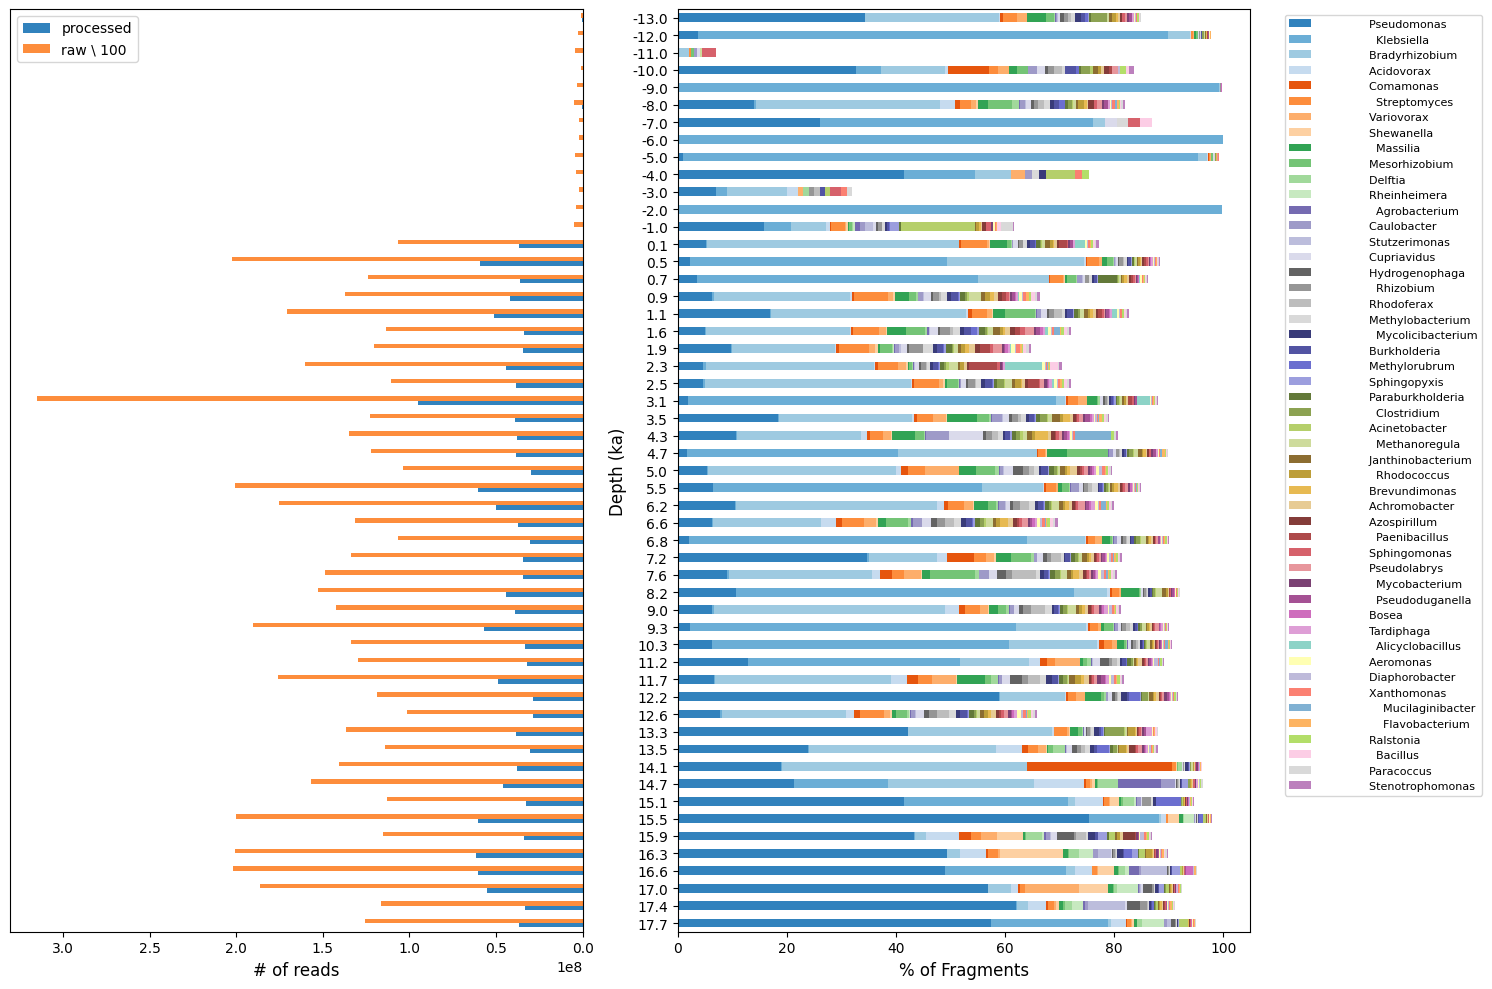

In [15]:
df_reads_stats['Sample'] = df_reads_stats["Sample"].replace(name_age_dict)
df_reads_stats.drop(df_reads_stats[df_reads_stats['Sample'].isin(duplicate_samples)].index, inplace=True)  
df_reads_stats.sort_values(by='Sample', inplace=True, ascending=True)

fig, axes = plt.subplots(1,2,figsize=(15, 10))
df_reads_stats['#_reads'] = np.where(df_reads_stats['label']== "raw",df_reads_stats['#_reads']/100, df_reads_stats['#_reads'])

pivot_df_reads_stats= df_reads_stats.pivot(index="Sample", columns="label", values="#_reads")
pivot_df_reads_stats.sort_index(ascending=False, inplace=True)

ax1 = pivot_df_reads_stats.plot(kind='barh',ax=axes[0], color=colour_stacked_bar)
ax1.invert_xaxis()
legend=axes[0].legend()
legend.get_texts()[1].set_text('raw \ 100')
axes[0].set_ylabel('')
axes[0].set_yticks([])
axes[0].set_xlabel('# of reads', fontsize=12)

df_read_taxonomy_genus = df_read_taxonomy[df_read_taxonomy['Rank']=="G"]

pivot_df_read_tax_genus = df_read_taxonomy_genus.pivot_table(index='Sample', columns='Name', values='#Fragments', aggfunc='sum').fillna(0)
pivot_df_read_tax_genus.sort_index(ascending=False, inplace=True)
#get the most abundant 50 Familys
colums_to_plot = []
df_tmp = df_read_taxonomy_genus[['Name','#Fragments']]
df_fam_name_abundance = df_tmp.groupby('Name').sum()
df_fam_name_abundance.reset_index(inplace=True)
df_fam_name_abundance.sort_values(by='#Fragments', inplace=True, ascending=False)

for i in range(50):
    if i >= 50:
        break
    colums_to_plot.append(df_fam_name_abundance.iloc[i,0])

total_fragment_number=df_read_taxonomy_genus.groupby('Sample')['#Fragments'].sum().reset_index()
df_merged = df_read_taxonomy_genus.merge(total_fragment_number, on='Sample', suffixes=('','_total'))


df_merged['Prop'] = (df_merged['#Fragments'] / df_merged['#Fragments_total'])*100
pivot_df_2 = df_merged.pivot(index='Sample', columns='Name', values='Prop').fillna(0)
pivot_df_2.sort_index(ascending=False, inplace=True)
pivot_df_2_selected = pivot_df_2[colums_to_plot]

pivot_df_2_selected.plot(kind='barh', stacked=True, ax=axes[1], color=custom_colours)
axes[1].set_ylabel('Depth (ka)', fontsize=12)
axes[1].set_xlabel('% of Fragments', fontsize=12)
axes[1].legend(fontsize=8, bbox_to_anchor=(1.05,1))
plt.tight_layout()


stacked barplot for genus and species abundace on read level 

output from Kraken2


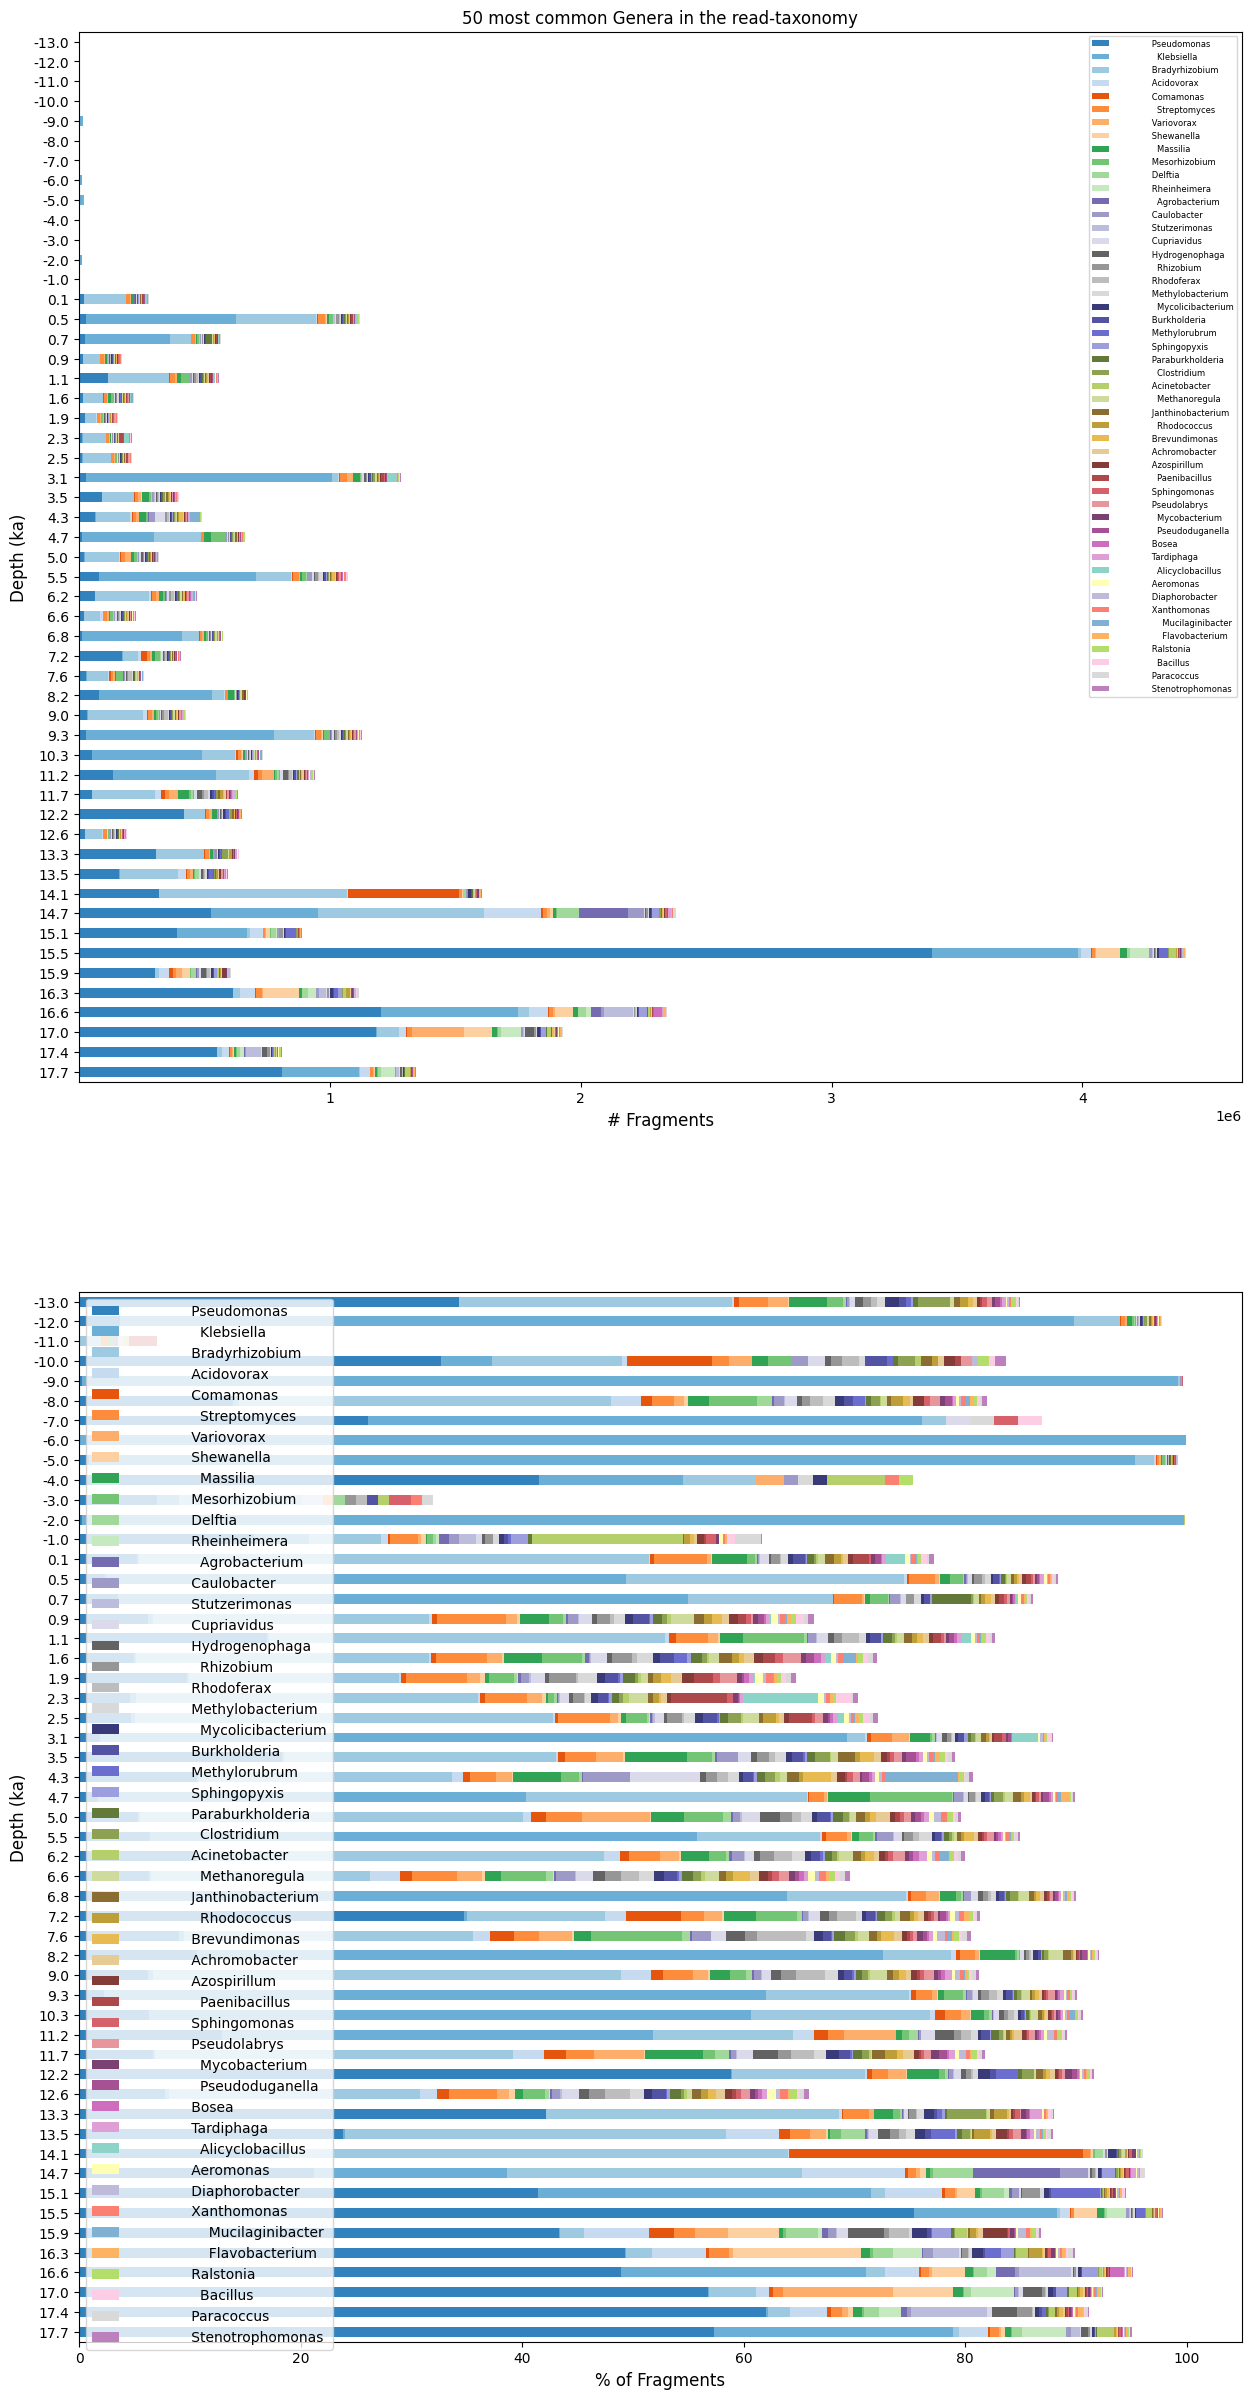

In [16]:
# Sample,Percentage,#Fragments,Rank,NCBI_Id,Name
#GENUS
fig, ax = plt.subplots(2,1,figsize=(15, 30))
df_read_taxonomy_genus = df_read_taxonomy[df_read_taxonomy['Rank']=="G"]

pivot_df_read_tax_genus = df_read_taxonomy_genus.pivot_table(index='Sample', columns='Name', values='#Fragments', aggfunc='sum').fillna(0)
pivot_df_read_tax_genus.sort_index(ascending=False, inplace=True)
#get the most abundant 50 Familys
colums_to_plot = []
df_tmp = df_read_taxonomy_genus[['Name','#Fragments']]
df_fam_name_abundance = df_tmp.groupby('Name').sum()
df_fam_name_abundance.reset_index(inplace=True)
df_fam_name_abundance.sort_values(by='#Fragments', inplace=True, ascending=False)

for i in range(50):
    if i >= 50:
        break
    colums_to_plot.append(df_fam_name_abundance.iloc[i,0])

pivot_df_read_tax_genus_selected = pivot_df_read_tax_genus[colums_to_plot]

pivot_df_read_tax_genus_selected.plot(kind='barh', stacked=True, ax=ax[0], color=custom_colours)
ax[0].set_title('50 most common Genera in the read-taxonomy')
ax[0].set_ylabel('Depth (ka)', fontsize=12)
ax[0].set_xlabel('# Fragments', fontsize=12)
ax[0].legend(fontsize=6)

total_fragment_number=df_read_taxonomy_genus.groupby('Sample')['#Fragments'].sum().reset_index()
df_merged = df_read_taxonomy_genus.merge(total_fragment_number, on='Sample', suffixes=('','_total'))


df_merged['Prop'] = (df_merged['#Fragments'] / df_merged['#Fragments_total'])*100
pivot_df_2 = df_merged.pivot(index='Sample', columns='Name', values='Prop').fillna(0)
pivot_df_2.sort_index(ascending=False, inplace=True)
pivot_df_2_selected = pivot_df_2[colums_to_plot]

pivot_df_2_selected.plot(kind='barh', stacked=True, ax=ax[1], color=custom_colours)
ax[1].set_ylabel('Depth (ka)', fontsize=12)
ax[1].set_xlabel('% of Fragments', fontsize=12)
ax[1].legend(fontsize=10)

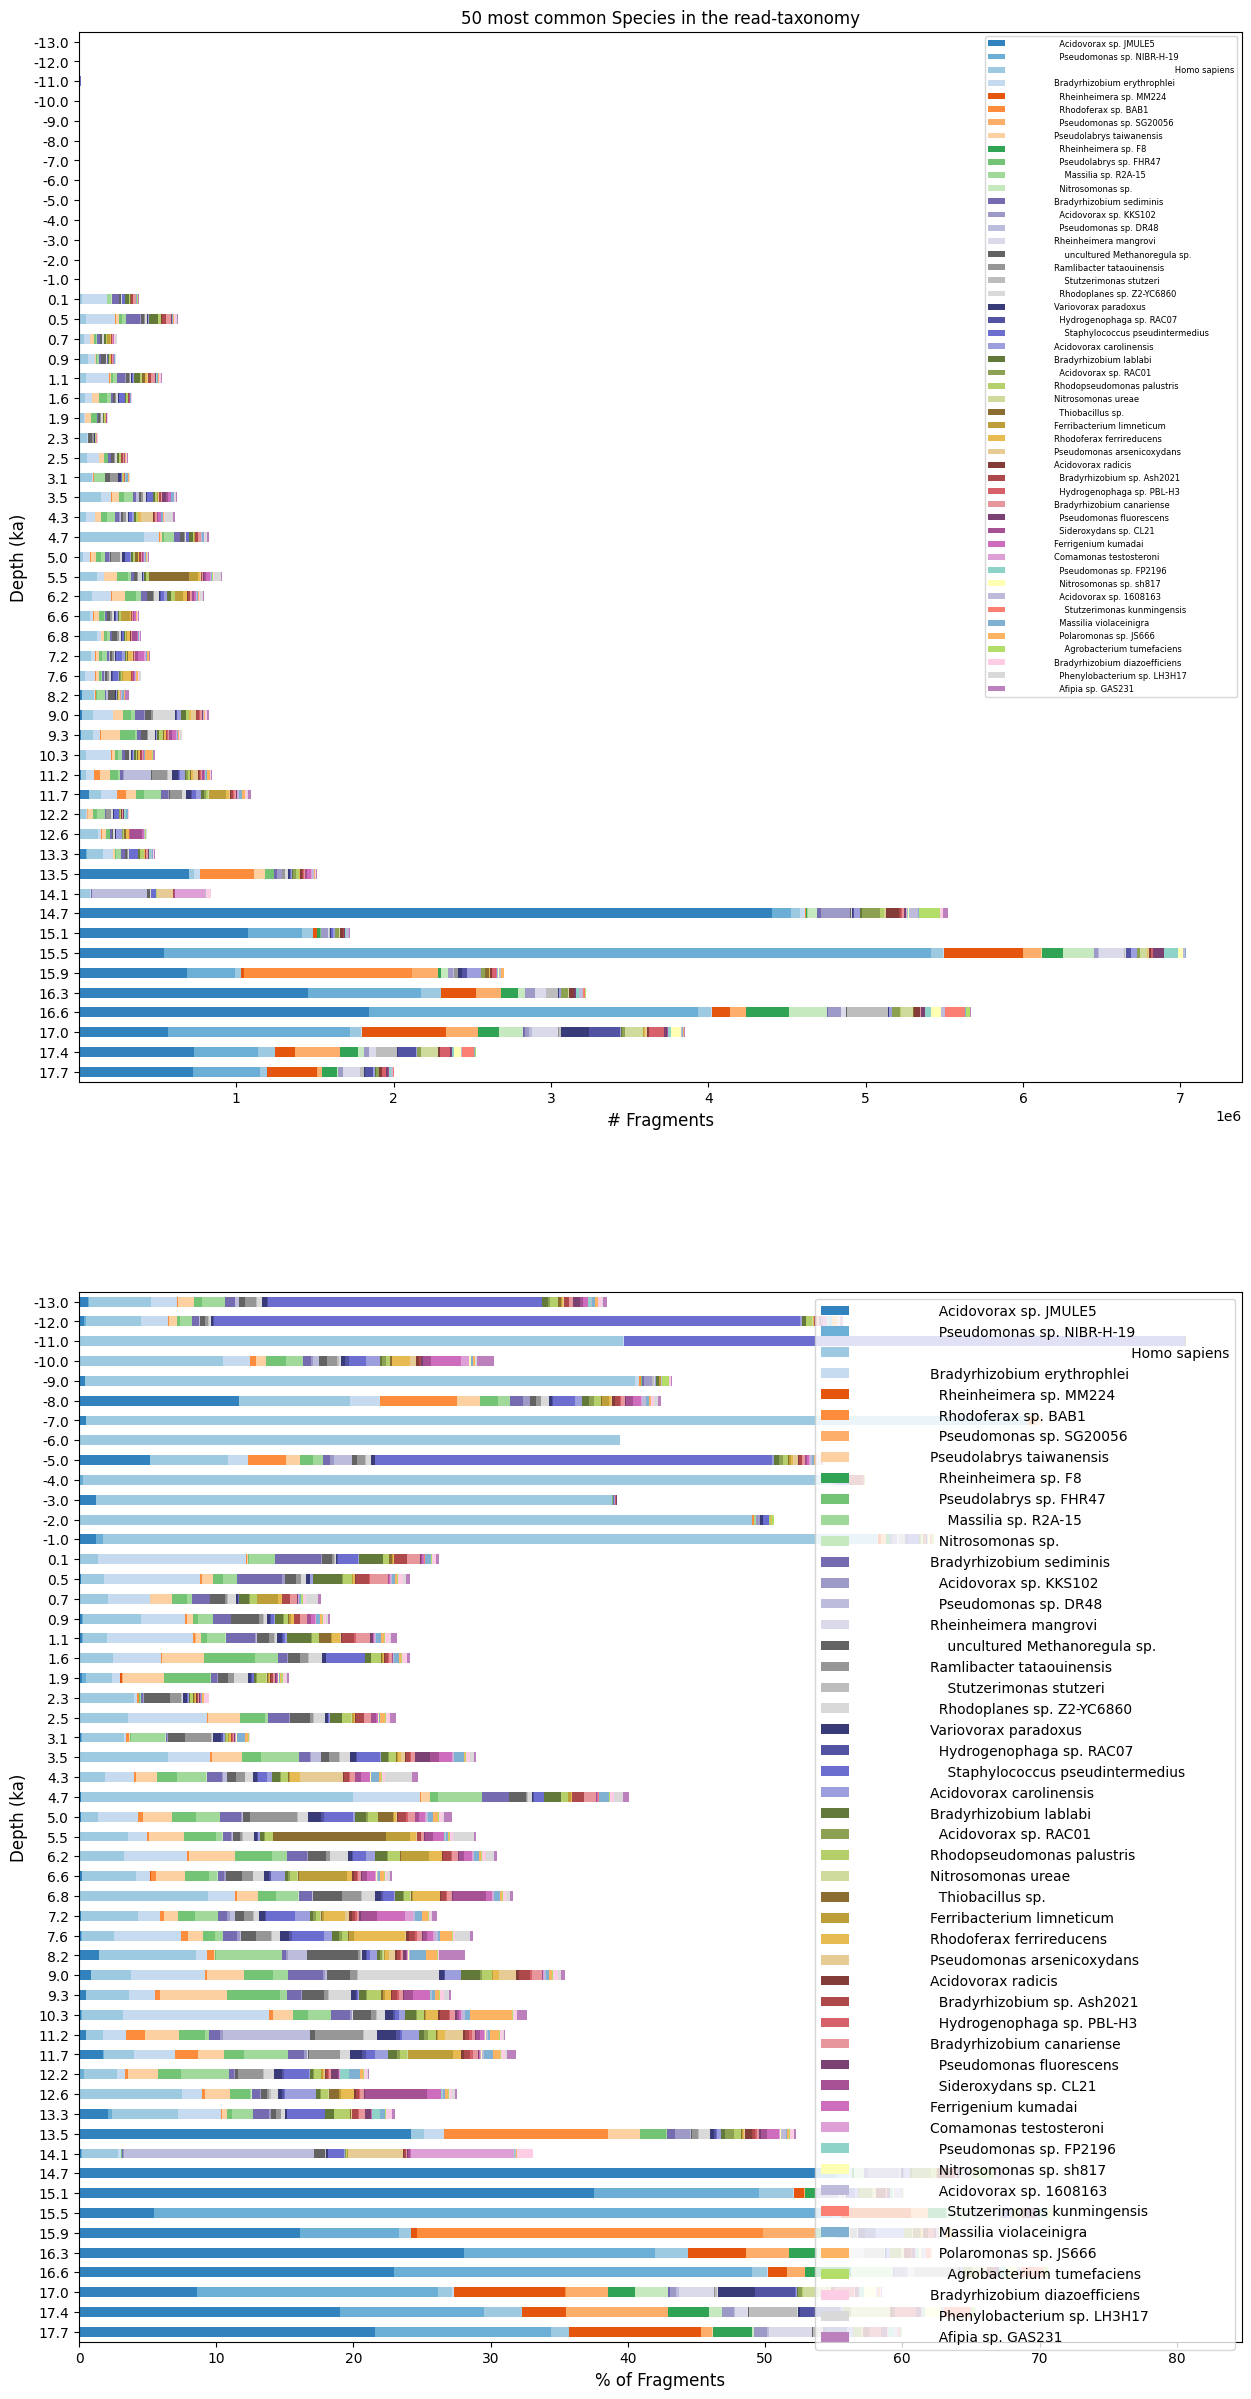

In [17]:
# Sample,Percentage,#Fragments,Rank,NCBI_Id,Name
#SPECIES
fig, ax = plt.subplots(2,1,figsize=(15, 30))
df_read_taxonomy_species = df_read_taxonomy[df_read_taxonomy['Rank']=="S"]

pivot_df_read_tax_species = df_read_taxonomy_species.pivot_table(index='Sample', columns='Name', values='#Fragments', aggfunc='sum').fillna(0)
pivot_df_read_tax_species.sort_index(ascending=False, inplace=True)
#get the most abundant 50 Familys
colums_to_plot = []
df_tmp = df_read_taxonomy_species[['Name','#Fragments']]
df_species_name_abundance = df_tmp.groupby('Name').sum()
df_species_name_abundance.reset_index(inplace=True)
df_species_name_abundance.sort_values(by='#Fragments', inplace=True, ascending=False)

for i in range(50):
    if i >= 50:
        break
    colums_to_plot.append(df_species_name_abundance.iloc[i,0])

pivot_df_read_tax_species_selected = pivot_df_read_tax_species[colums_to_plot]

pivot_df_read_tax_species_selected.plot(kind='barh', stacked=True, ax=ax[0], color=custom_colours)
ax[0].set_title('50 most common Species in the read-taxonomy')
ax[0].set_ylabel('Depth (ka)', fontsize=12)
ax[0].set_xlabel('# Fragments', fontsize=12)
ax[0].legend(fontsize=6)

total_fragment_number=df_read_taxonomy_species.groupby('Sample')['#Fragments'].sum().reset_index()
df_merged = df_read_taxonomy_species.merge(total_fragment_number, on='Sample', suffixes=('','_total'))


df_merged['Prop'] = (df_merged['#Fragments'] / df_merged['#Fragments_total'])*100
pivot_df_2 = df_merged.pivot(index='Sample', columns='Name', values='Prop').fillna(0)
pivot_df_2.sort_index(ascending=False, inplace=True)
pivot_df_2_selected = pivot_df_2[colums_to_plot]

pivot_df_2_selected.plot(kind='barh', stacked=True, ax=ax[1], color=custom_colours)
ax[1].set_ylabel('Depth (ka)', fontsize=12)
ax[1].set_xlabel('% of Fragments', fontsize=12)
ax[1].legend(fontsize=10)

### Contigs

stats for contigs as plot

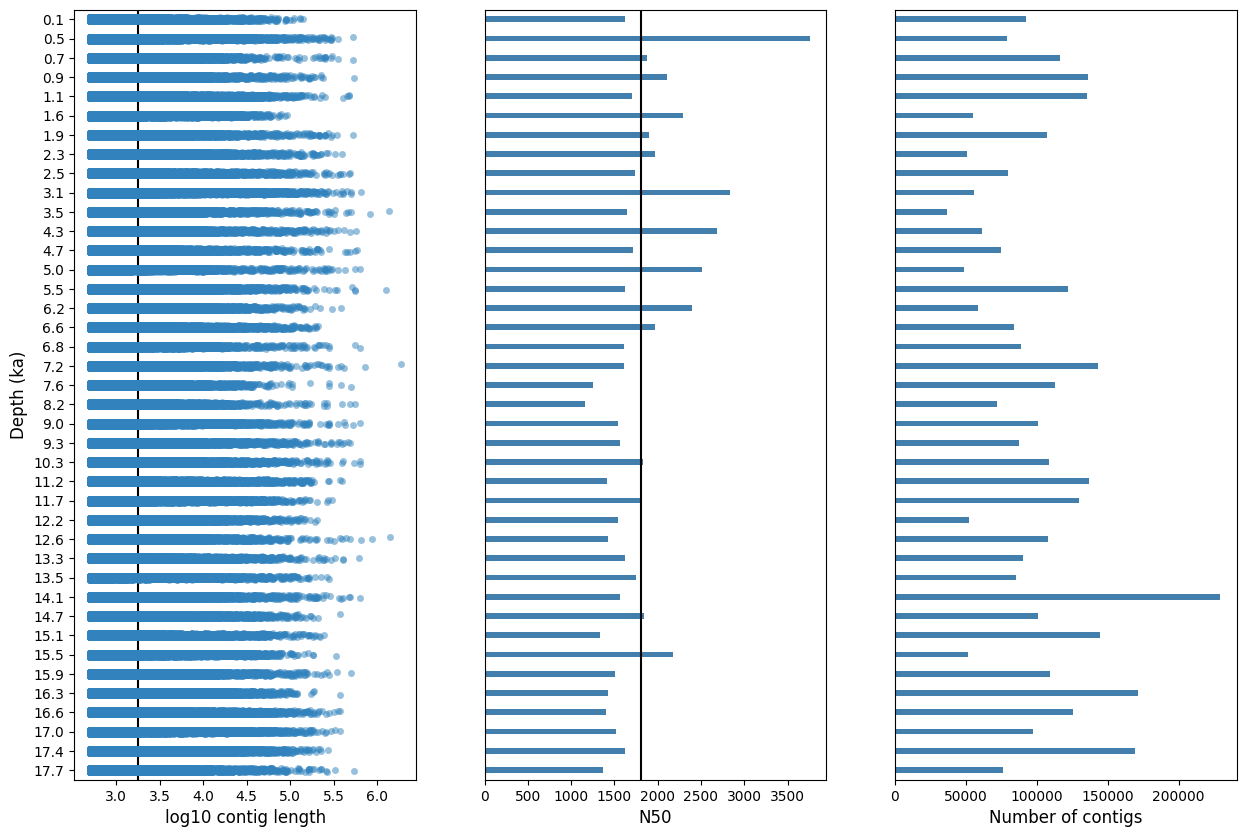

In [18]:
fig, axes = plt.subplots(1,3,figsize=(15, 10))

df_contig_stats = dataset
df_contig_stats['log_contig_length'] = np.log10(dataset['contig_length'])
df_contig_stats['log_N50'] = np.log10(dataset['N50'])
df_contig_stats['log_#_bases'] = np.log10(dataset['Total length'])
df_contig_stats['log_#_contigs'] = np.log10(dataset['# contigs (>= 0 bp)'])
dataset.sort_values('Sample', ascending=False, inplace=True)


df_plot.drop(df_plot[df_plot['Sample'].isin(megahit_duplicates_samples)].index, inplace=True)

df_plot.sort_values(by='age', inplace=True, ascending=False)

df_plot.drop(['contig_id','contig_length'], axis=1, inplace=True)
df_plot.drop_duplicates(inplace=True)

aggregated = df_contig_stats.groupby('Sample')['log_contig_length'].describe().reset_index()

sns.stripplot(data=df_contig_stats, x='log_contig_length', y='Sample', color='#3182bd', orient='h', jitter=True, ax = axes[0],alpha=0.5)

sns.barplot(data=df_plot, x='N50', y ='Sample', ax=axes[1], width=0.3, color='#3182bd')

sns.barplot(data=df_plot, x='# contigs (>= 0 bp)', y ='Sample', ax=axes[2], width=0.3, color='#3182bd')

axes[0].set_xlabel("log10 contig length", fontsize=12)
axes[0].set_ylabel("Depth (ka)", fontsize=12)

axes[1].set_xlabel("N50", fontsize=12)
axes[1].set_yticks([])
axes[1].set_ylabel('')

axes[2].set_xlabel("Number of contigs", fontsize=12)
axes[2].set_yticks([])
axes[2].set_ylabel('')

averageN50 = df_plot['N50'].sum()/40
axes[0].axvline(x=np.log10(averageN50), color='black')
axes[1].axvline(x=averageN50, color='black')




#### Boxplot

Stacked barplot for how many reads mapped to the contigs

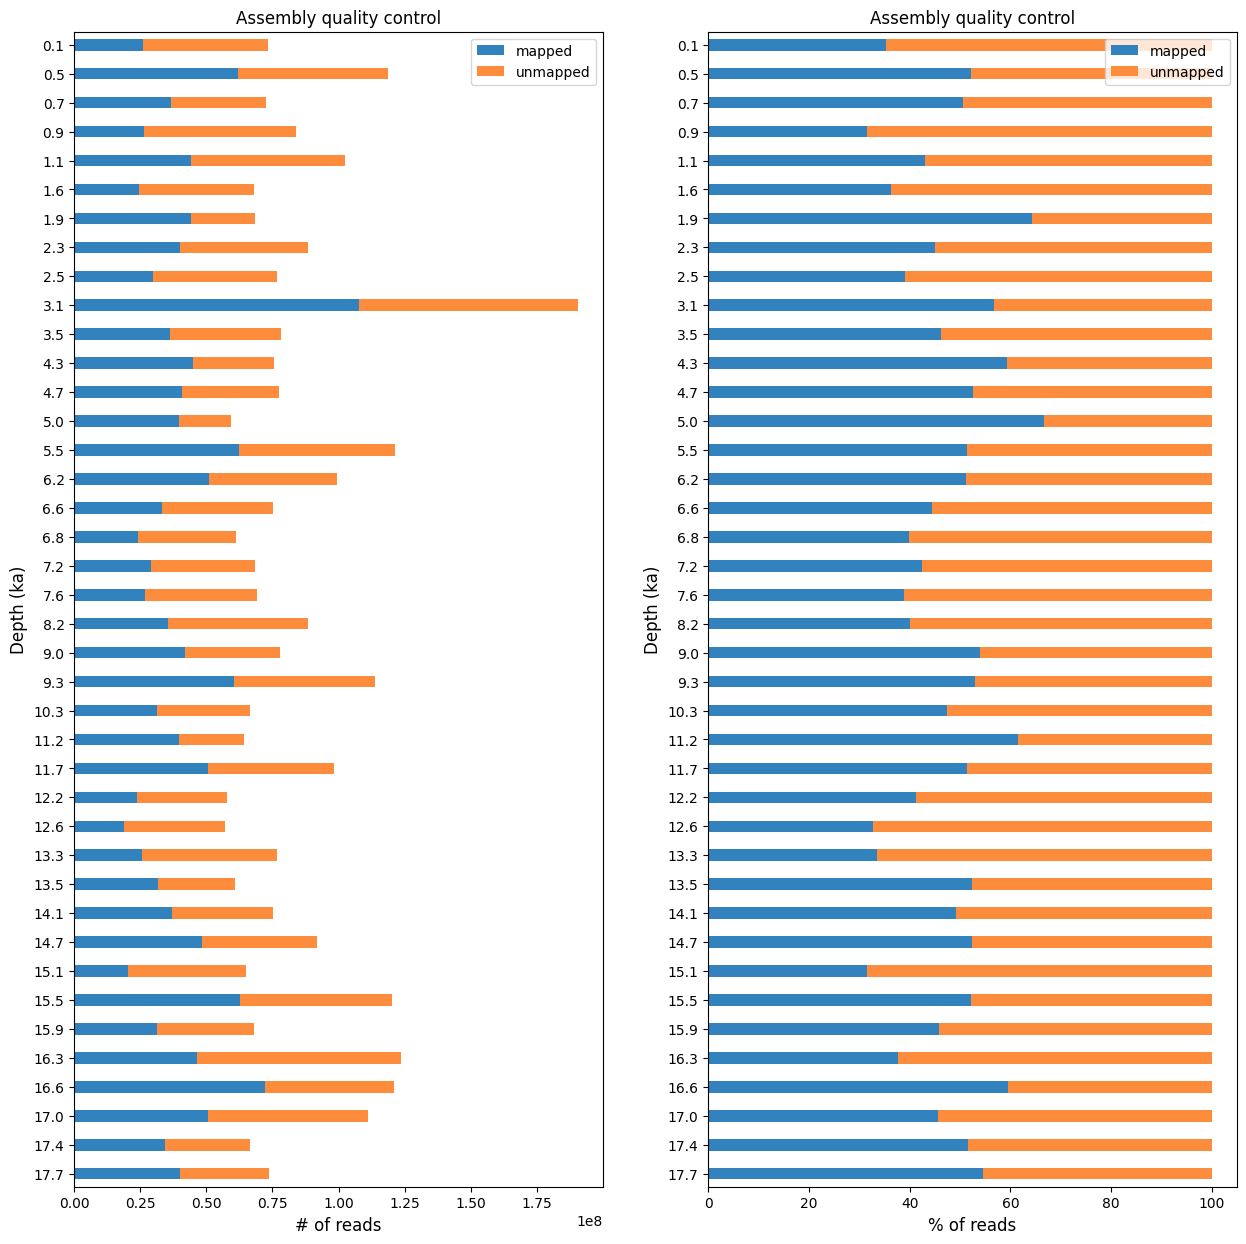

In [19]:
# Sample, mapped or unmapped, # of reads

fig, axes = plt.subplots(1, 2, figsize=(15, 15))


pivot_df = df.pivot(index='Sample', columns='label', values='#_reads').fillna(0)
pivot_df.sort_index(ascending=False, inplace=True)

# Create a stacked bar plot
pivot_df.plot(kind='barh', stacked=True, ax=axes[0], width=0.4,color=colour_stacked_bar)

# Customize the plot
axes[0].set_title('Assembly quality control')
axes[0].set_xlabel("# of reads", fontsize=12)
axes[0].set_ylabel('Depth (ka)', fontsize=12)
axes[0].legend()

total_read_number=df.groupby('Sample')['#_reads'].sum().reset_index()

df_merged = df.merge(total_read_number, on='Sample', suffixes=('','_total'))

df_merged['Prop'] = (df_merged['#_reads'] / df_merged['#_reads_total'])*100
pivot_df_2 = df_merged.pivot(index='Sample', columns='label', values='Prop').fillna(0)
pivot_df_2.sort_index(ascending=False, inplace=True)

# Create a stacked bar plot
pivot_df_2.plot(kind='barh', stacked=True,ax=axes[1], width=0.4,color=colour_stacked_bar)

# Customize the plot
axes[1].set_title('Assembly quality control')
axes[1].set_xlabel("% of reads", fontsize=12)
axes[1].set_ylabel('Depth (ka)', fontsize=12)
axes[1].legend()

plt.show()


coverage for each sample

/scratch/tmp/ipykernel_7986/2347206487.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mapped_length['Sample'].replace(name_age_dict, inplace =True)
/scratch/tmp/ipykernel_7986/2347206487.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mapped_length['Sample'].replace(name_age_dict, i

Text(0.5, 0, 'contig length')

/home/mkaiser/miniconda3/envs/plotting/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/mkaiser/miniconda3/envs/plotting/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


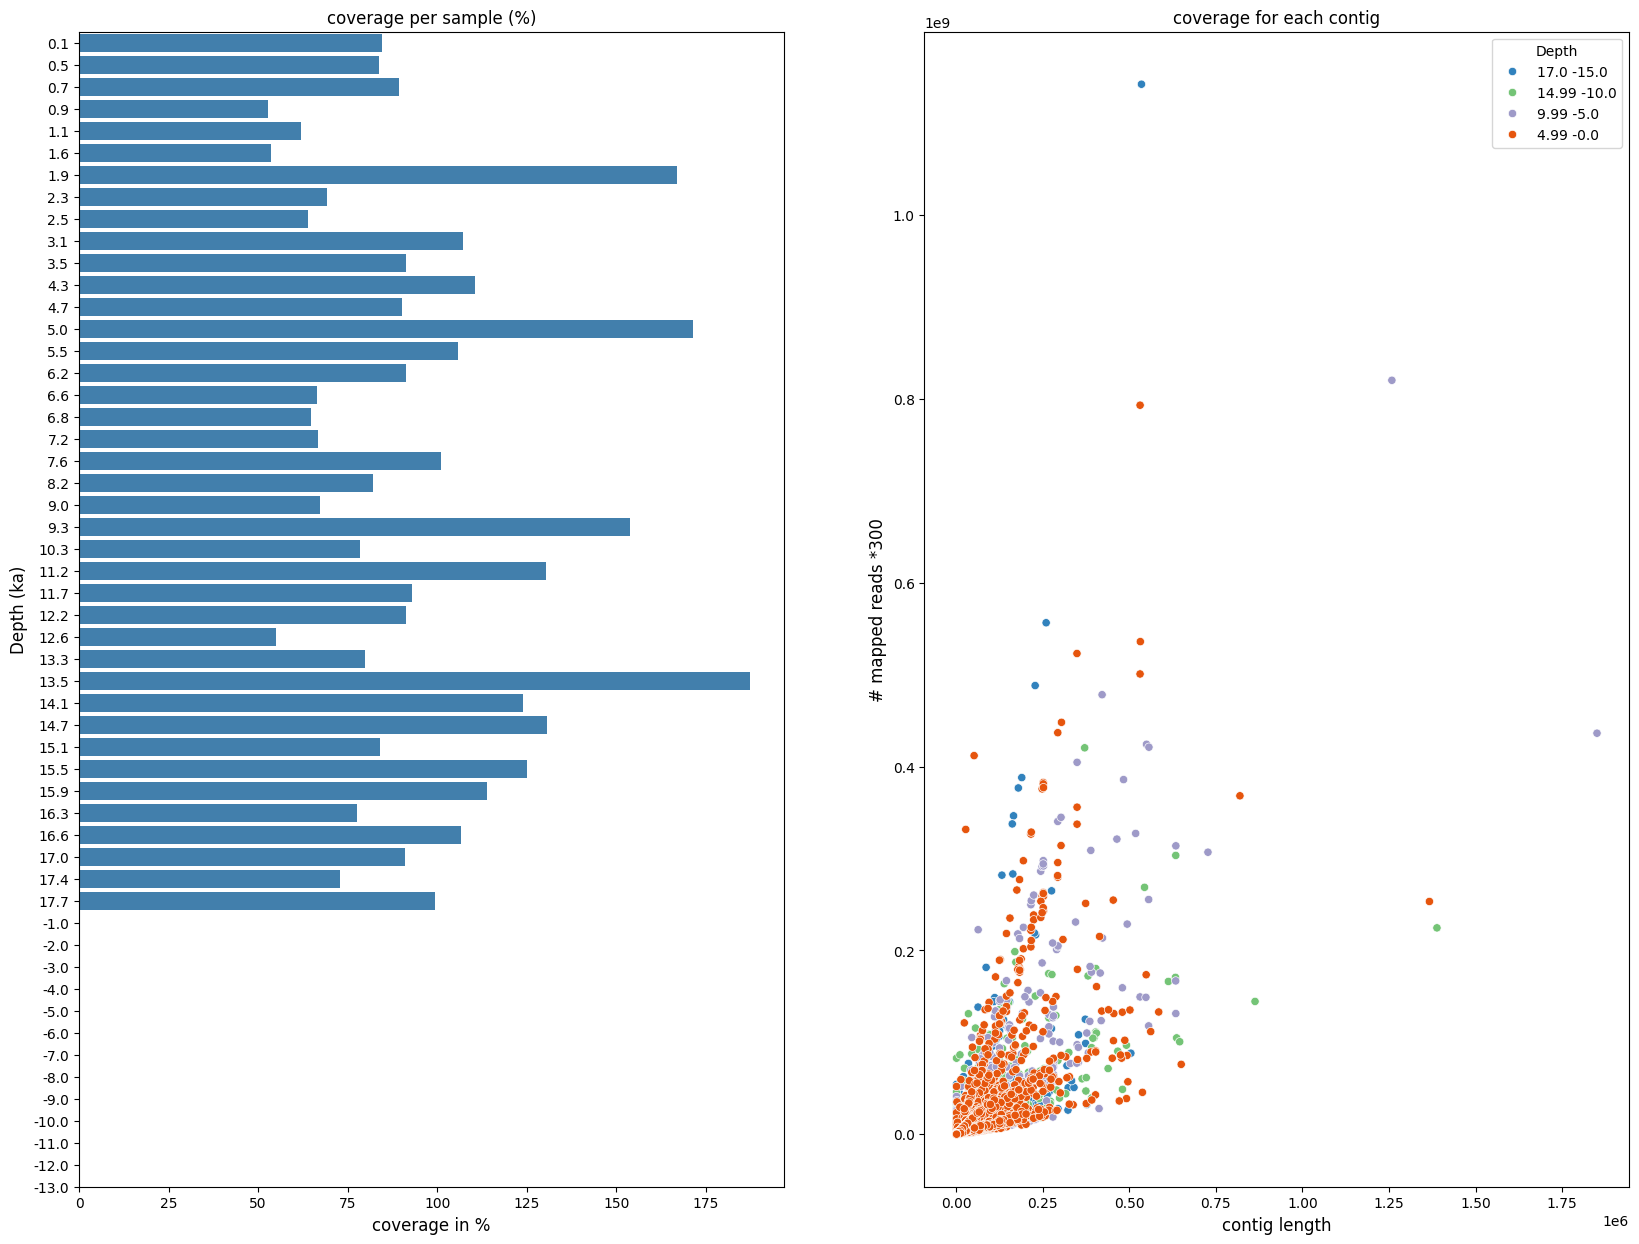

In [20]:
#coverage= (number of mapped reads * 2 * read length)/ sum(contig length)
fig, axes = plt.subplots(1, 2, figsize=(20, 15))

df_mapped_length.drop(df_mapped_length[df_mapped_length['Sample'].isin(duplicate_samples)].index, inplace=True)


df_mapped_reads = df_mapped_length.groupby('Sample')['#mapped_reads'].sum().reset_index()
df_length = df_mapped_length.groupby('Sample')['length'].sum().reset_index()

data = df_mapped_reads.merge(df_length, on='Sample')

data['coverage'] = (data['#mapped_reads'] * 300) / data['length']

data.sort_values('Sample',ascending=False, inplace=True)

sns.barplot(data=data, y='Sample', x='coverage', ax=axes[0], color='#3182bd')
axes[0].set_xlabel('coverage in %', fontsize=12)
axes[0].set_ylabel('Depth (ka)', fontsize=12)
axes[0].set_yticks(list(name_age_dict.keys()),list(name_age_dict.values()))
axes[0].set_title('coverage per sample (%)')

df_mapped_length['#mapped_reads*300']=df_mapped_length['#mapped_reads']*300


df_mapped_length['Depth'] = 'controll'
df_mapped_length.loc[df_mapped_length['Sample'].isin(['ERR12814414','ERR12814416','ERR12814417','ERR12814418','ERR12814419','ERR12814422','ERR12814424','ERR12814425']), 'Depth'] = '17.0 -15.0'
df_mapped_length.loc[df_mapped_length['Sample'].isin(['ERR12814428','ERR12814430','ERR12814431', 'ERR12814432', 'ERR12814434', 'ERR12814436', 'ERR12814438', 'ERR12814440', 'ERR12814443']), 'Depth'] = '14.99 -10.0'
df_mapped_length.loc[df_mapped_length['Sample'].isin(['ERR12814444', 'ERR12814446', 'ERR12814448', 'ERR12814450', 'ERR12814453', 'ERR12814454', 'ERR12814455', 'ERR12814457', 'ERR12814458', 'ERR12814460']), 'Depth'] = '9.99 -5.0'
df_mapped_length.loc[df_mapped_length['Sample'].isin(['ERR12814461', 'ERR12814463', 'ERR12814464', 'ERR12814465', 'ERR12814467', 'ERR12814469', 'ERR12814470', 'ERR12814471', 'ERR12814472', 'ERR12814473', 'ERR12814474', 'ERR12814475', 'ERR12814476']), 'Depth'] = '4.99 -0.0'

df_mapped_length['Sample'].replace(name_age_dict, inplace =True)
df_mapped_length['contig_id']=df_mapped_length['contig']

df_bins_contigs_mapped_length = df_mapped_length.merge(df_bins_contigs, on=['Sample', 'contig_id'])

custom_palette = {'17.0 -15.0': '#3182bd', '14.99 -10.0': '#74c476', '9.99 -5.0': '#9e9ac8','4.99 -0.0':'#e6550d'}
sns.scatterplot(data=df_mapped_length,y='#mapped_reads*300', x='length',hue='Depth', ax=axes[1], palette=custom_palette)
axes[1].set_title('coverage for each contig')
axes[1].set_ylabel('# mapped reads *300', fontsize=12)
axes[1].set_xlabel('contig length', fontsize=12)


plot for how many damaged contig are in each sample

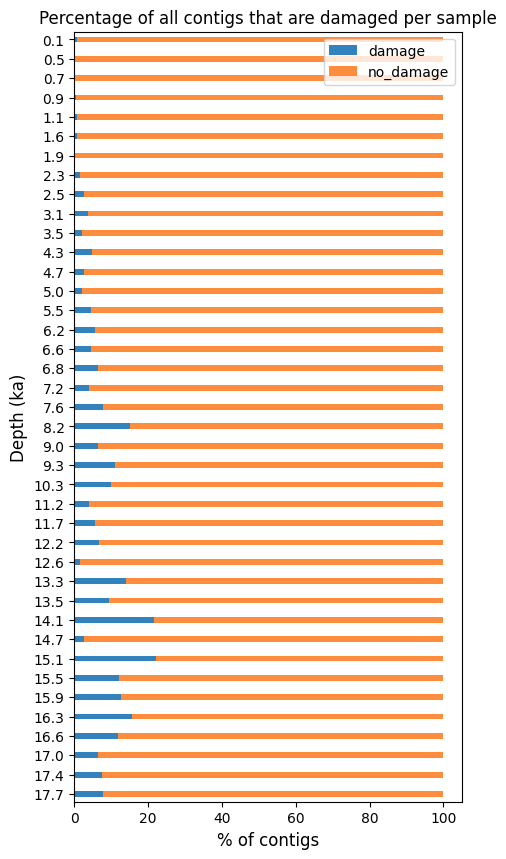

In [21]:
fig, axes = plt.subplots(figsize=(5, 10))

df_pydamage['Damaged'] = np.where((df_pydamage['predicted_accuracy']>= 0.5) & (df_pydamage['qvalue'] <= 0.05),'damage','no_damage')

def count_contigs(row):
    return ((df_pydamage['Sample']==row['Sample']) & (df_pydamage['Damaged'] == row['Damaged'])).sum()

unique_samples = df_pydamage['Sample'].unique()

data={
    'Sample': [],
    'Damaged': [],
    '#contigs': []
}

for sample in unique_samples:
    count_condition_damage = ((df_pydamage['Sample'] == sample) & (df_pydamage['Damaged'] == 'damage')).sum()
    count_condition_nodamage = ((df_pydamage['Sample'] == sample) & (df_pydamage['Damaged'] == 'no_damage')).sum()
    data['Sample'].append(sample)
    data['Damaged'].append('damage')
    data['#contigs'].append(count_condition_damage)

    data['Sample'].append(sample)
    data['Damaged'].append('no_damage')
    data['#contigs'].append(count_condition_nodamage)
  
df_pydamage_counts= pd.DataFrame(data)

pivot_df_pydamage_counts = df_pydamage_counts.pivot(index='Sample', columns='Damaged', values='#contigs').fillna(0)
pivot_df_pydamage_counts.sort_index(ascending=False, inplace=True)
total_read_number=df_pydamage_counts.groupby('Sample')['#contigs'].sum().reset_index()


df_pydamage_counts_merged = df_pydamage_counts.merge(total_read_number, on='Sample', suffixes=('','_total'))

df_pydamage_counts_merged['Prop'] = (df_pydamage_counts_merged['#contigs'] / df_pydamage_counts_merged['#contigs_total'])*100
pivot_df_pydamage_counts_merged = df_pydamage_counts_merged.pivot(index='Sample', columns='Damaged', values='Prop').fillna(0)
pivot_df_pydamage_counts_merged.sort_index(ascending=False, inplace=True)

pivot_df_pydamage_counts_merged.plot(kind='barh', stacked=True, ax=axes,width=0.3, color=[damage_colour_dict[col] for col in pivot_df_pydamage_counts_merged.columns])


axes.set_xlabel("% of contigs", fontsize=12)
axes.set_ylabel('Depth (ka)', fontsize=12)
axes.set_title('Percentage of all contigs that are damaged per sample')
axes.legend(fontsize=10, loc='upper right')

plt.show()

### Binning

quality for unrefined and refined bins

Text(0.5, 47.7222222222222, 'Completion (%)')

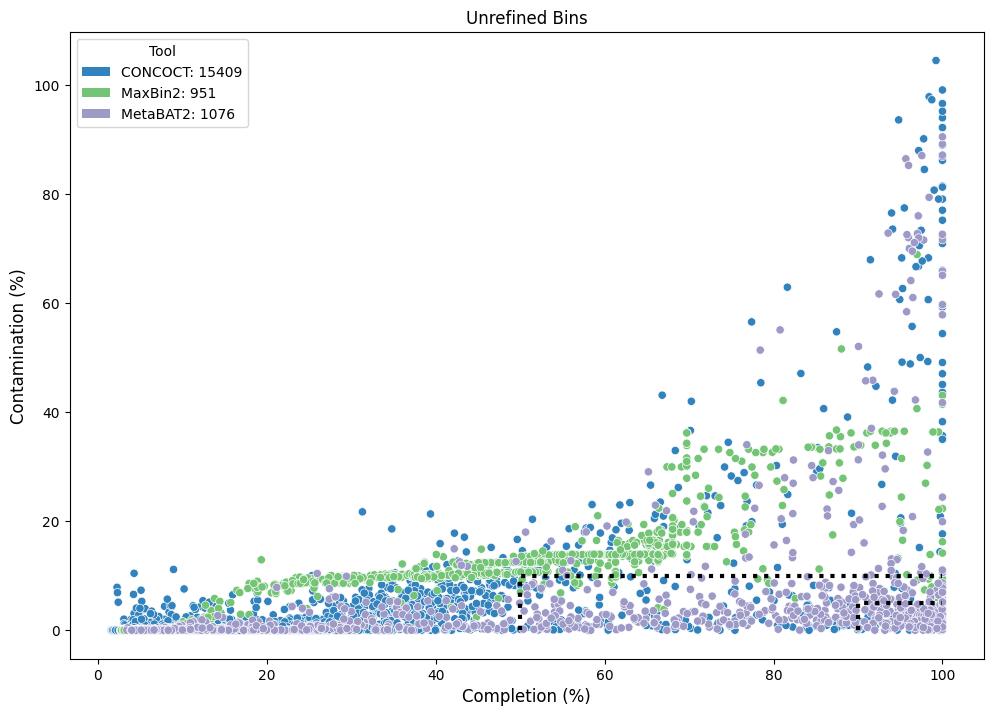

In [22]:
# quality report from checkm2 for unrefined bins

fig, axes = plt.subplots(figsize=(10,7))
df_qc_checkm2_unrefined['tool'] = (df_qc_checkm2_unrefined['Name']).str.split('-').str[1]

df_qc_checkm2_unrefined['Sample'] = (df_qc_checkm2_unrefined['Name']).str.split('-').str[2]
df_qc_checkm2_unrefined['Sample'] = df_qc_checkm2_unrefined['Sample'].str[:11]
df_qc_checkm2_unrefined.drop(df_qc_checkm2_unrefined[df_qc_checkm2_unrefined['Sample'].isin(duplicate_samples)].index, inplace=True)  
custom_palette = {'CONCOCT': '#3182bd', 'MaxBin2': '#74c476', 'MetaBAT2': '#9e9ac8'}

sns.scatterplot(data=df_qc_checkm2_unrefined, x='Completeness', y='Contamination', hue= 'tool', palette=custom_palette, legend=False)
legend_elemets=[]
legend_elemets.append(Patch(facecolor=custom_palette['CONCOCT'], label='CONCOCT: 15409'))
legend_elemets.append(Patch(facecolor=custom_palette['MaxBin2'], label='MaxBin2: 951'))
legend_elemets.append(Patch(facecolor=custom_palette['MetaBAT2'], label='MetaBAT2: 1076'))

plt.legend(handles=legend_elemets, title='Tool', loc='upper left')
fig.tight_layout()

plt.title('Unrefined Bins')
line_hqx =[90,90,100]
line_hqy = [0,5,5]
line_mqx =[50,50,100]
line_mqy = [0,10,10]
plt.plot(line_hqx, line_hqy,color='black', linewidth=3, linestyle='dotted', label='HQ')
plt.plot(line_mqx, line_mqy,color='black', linewidth=3, linestyle='dotted', label='MQ')

plt.ylabel('Contamination (%)', fontsize=12)
plt.xlabel('Completion (%)', fontsize=12)


Text(0.5, 47.7222222222222, 'Completion (%)')

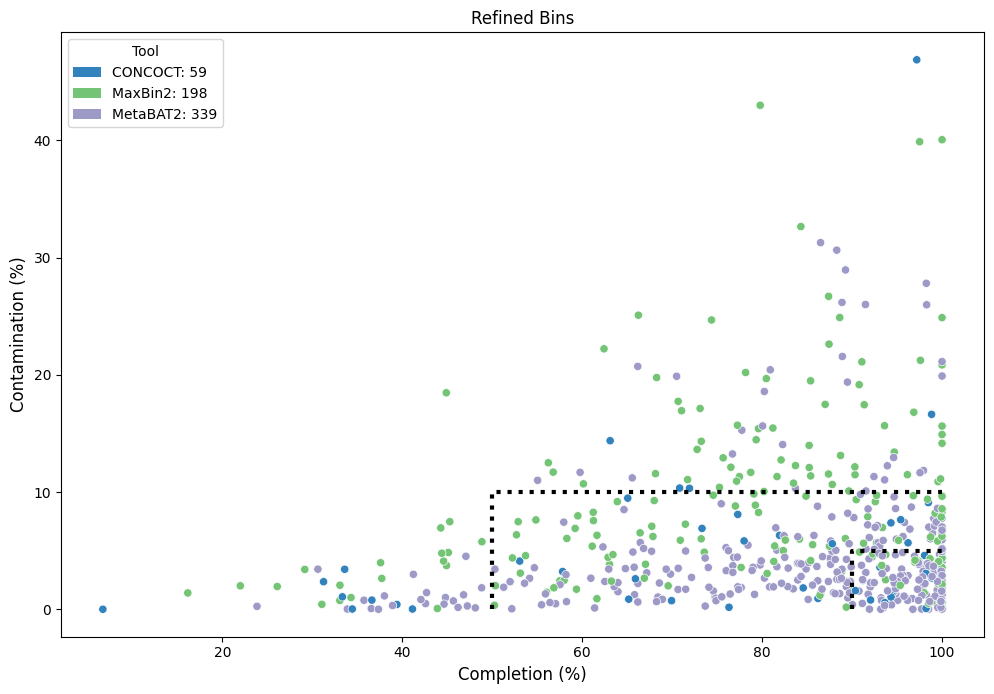

In [23]:
# quality report from checkm2 for refined bins

fig, axes = plt.subplots(figsize=(10,7))
df_qc_checkm2_refined['tool'] = (df_qc_checkm2_refined['Name']).str.split('-').str[1]
df_qc_checkm2_refined['Sample'] = (df_qc_checkm2_refined['Name']).str.split('-').str[2]
df_qc_checkm2_refined['Sample'] = df_qc_checkm2_refined['Sample'].str[:11]
df_qc_checkm2_refined.drop(df_qc_checkm2_refined[df_qc_checkm2_refined['Sample'].isin(duplicate_samples)].index, inplace=True)
custom_palette = {'CONCOCTRefined': '#3182bd', 'MaxBin2Refined': '#74c476', 'MetaBAT2Refined': '#9e9ac8'}

sns.scatterplot(data=df_qc_checkm2_refined, x='Completeness', y='Contamination', hue= 'tool', palette=custom_palette,legend=False)
plt.title('Refined Bins')
legend_elemets=[]
legend_elemets.append(Patch(facecolor=custom_palette['CONCOCTRefined'], label='CONCOCT: 59'))
legend_elemets.append(Patch(facecolor=custom_palette['MaxBin2Refined'], label='MaxBin2: 198'))
legend_elemets.append(Patch(facecolor=custom_palette['MetaBAT2Refined'], label='MetaBAT2: 339'))

plt.legend(handles=legend_elemets, title='Tool', loc='upper left')
fig.tight_layout()

line_hqx =[90,90,100]
line_hqy = [0,5,5]
line_mqx =[50,50,100]
line_mqy = [0,10,10]
plt.plot(line_hqx, line_hqy,color='black', linewidth=3, linestyle='dotted', label='HQ')
plt.plot(line_mqx, line_mqy,color='black', linewidth=3, linestyle='dotted', label='MQ')

plt.ylabel('Contamination (%)', fontsize=12)
plt.xlabel('Completion (%)', fontsize=12)

##### CAT Taxonomy

/scratch/tmp/ipykernel_7986/3995652256.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] == old_row[0]:
/scratch/tmp/ipykernel_7986/3995652256.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[5] != 'no support' and old_row[5] != 'no support':
/scratch/tmp/ipykernel_7986/3995652256.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if float(row[5].split(':')[1]) > float(old_row[5].split(':')[1]):
/scratch/tm

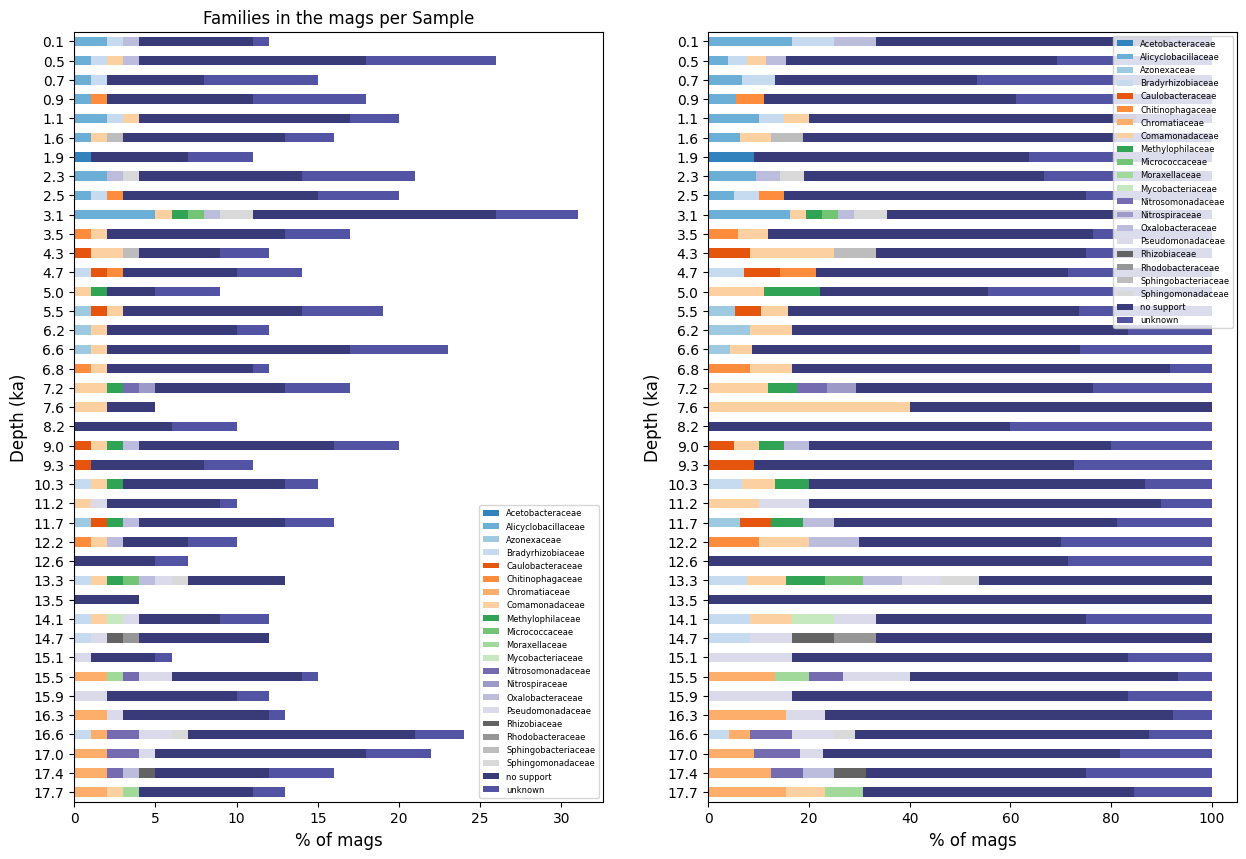

In [24]:
#FAMILY

fig, axes = plt.subplots(1,2,figsize=(15,10))
df_cat['Sample'] = (df_cat['# bin']).str.split('-').str[2]
df_cat['Sample'] = df_cat['Sample'].str[:11]
df_cat['family'] = (df_cat['family']).str.split(':').str[0]

df_cat.fillna('unknown', inplace=True)

i=0
old_row="         "
for index, row in df_cat.iterrows():
    if row[0] == old_row[0]:
        if row[5] != 'no support' and old_row[5] != 'no support':
            if float(row[5].split(':')[1]) > float(old_row[5].split(':')[1]):
                df_cat.drop(index=index-1, inplace=True) # nimm row
                i+=1
            elif float(row[5].split(':')[1]) < float(old_row[5].split(':')[1]):
                df_cat.drop(index=index, inplace=True) # nimm old_row
                i+=1
            else:
                if row[6] != 'no support' and old_row[6] != 'no support':
                    if float(row[6].split(':')[1]) > float(old_row[6].split(':')[1]):
                        df_cat.drop(index=index-1, inplace=True) # nimm row
                        i+=1
                    elif float(row[6].split(':')[1]) < float(old_row[6].split(':')[1]):

                        df_cat.drop(index=index, inplace=True) # nimm old_row
                        i+=1
                    else:
                        if row[7] != 'no support' and old_row[7] != 'no support':
                            if float(row[7].split(':')[1]) > float(old_row[7].split(':')[1]):
                                df_cat.drop(index=index-1, inplace=True) # nimm row
                                i+=1
                            elif float(row[7].split(':')[1]) < float(old_row[7].split(':')[1]):
                                df_cat.drop(index=index, inplace=True) # nimm old_row
                                i+=1
                            else:
                                pass
                
                else:
                    if row[5] == 'no support':
                        df_cat.drop(index=index, inplace=True) # nimm old_row
                        i+=1
                    else:
                        df_cat.drop(index=index-1, inplace=True) # nimm row
                        i+=1
        else:
            pass
            

    old_row=row
df_cat.dropna()

for index, row in df_cat.iterrows():

    if 'Unbinned' in row[0]:
        df_cat.drop(index=index, inplace=True)

df_cat.drop(df_cat[df_cat['Sample'].isin(duplicate_samples)].index, inplace=True)
df_cat.replace(name_age_dict, inplace=True)

df_cat['# bins'] = 1

df_cat_fam=df_cat.drop(['classification', 'reason','lineage','lineage scores','superkingdom','phylum','class','order','genus','species','# bin'], axis=1)
pivot_df_cat_fam = df_cat_fam.pivot_table(index='Sample', columns='family',values='# bins', aggfunc='sum').fillna(0)
pivot_df_cat_fam.sort_index(ascending=False, inplace=True)

pivot_df_cat_fam.plot(kind='barh', stacked=True, ax=axes[0], color=custom_colours)
axes[0].set_ylabel('Depth (ka)', fontsize=12)
axes[0].set_xlabel('% of mags', fontsize=12)
axes[0].set_title('Families in the mags per Sample')
axes[0].legend(fontsize=6)

total_bin_number=df_cat_fam.groupby('Sample', as_index=False).agg({'# bins': 'sum'})

df_cat_fam_grouped=df_cat_fam.groupby(['Sample','family'], as_index=False).agg({'# bins': 'sum'})

df_cat_fam_merged = df_cat_fam_grouped.merge(total_bin_number, on='Sample', suffixes=('','_total'))

df_cat_fam_merged['Prop'] = (df_cat_fam_merged['# bins'] / df_cat_fam_merged['# bins_total'])*100

pivot_df_cat_fam_merged = df_cat_fam_merged.pivot_table(index='Sample', columns='family',values='Prop', aggfunc='sum').fillna(0)
pivot_df_cat_fam_merged.sort_index(ascending=False, inplace=True)

pivot_df_cat_fam_merged.plot(kind='barh', stacked=True, ax=axes[1], color=custom_colours)
axes[1].set_ylabel('Depth (ka)', fontsize=12)
axes[1].set_xlabel('% of mags', fontsize=12)
axes[1].legend(fontsize=6, loc='upper right')

/scratch/tmp/ipykernel_7986/2934191975.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat.replace(name_age_dict, inplace=True)


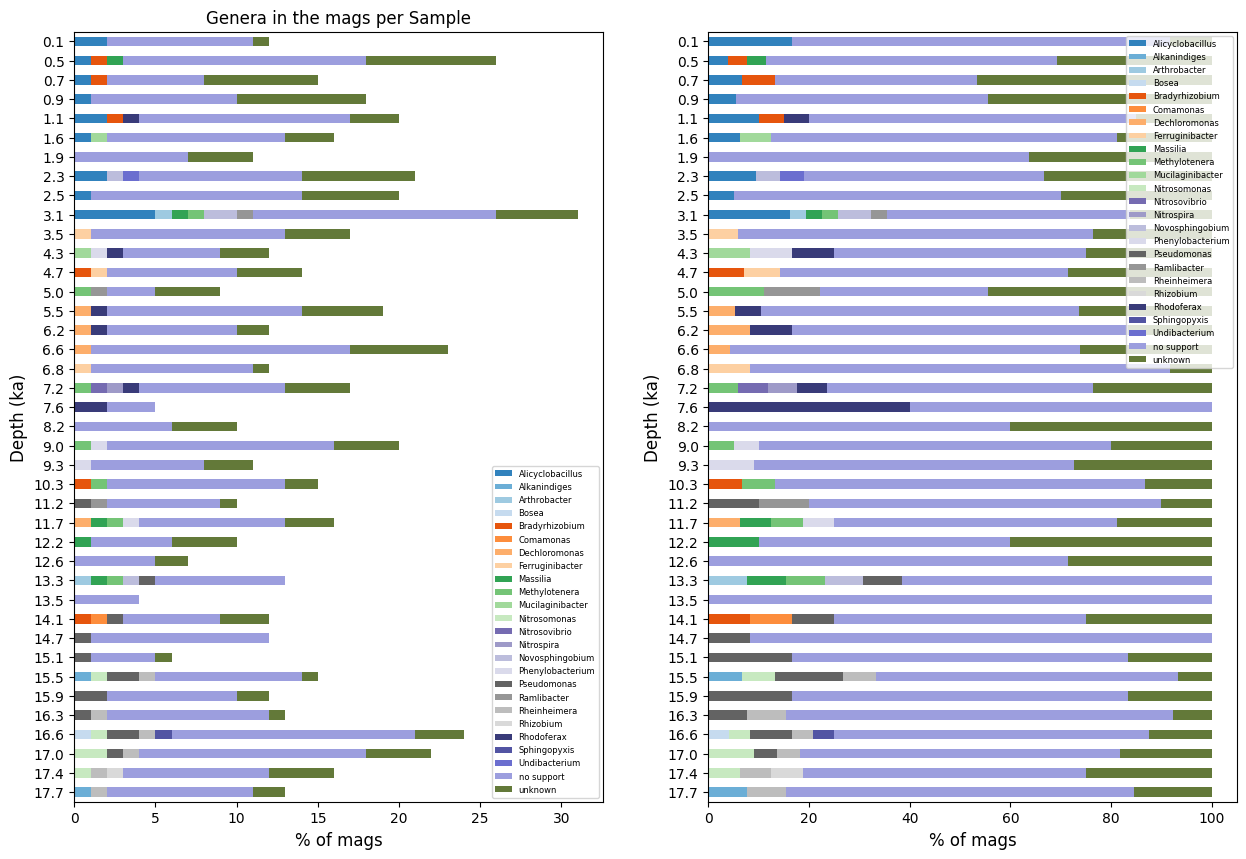

In [25]:
#GENUS
fig, axes = plt.subplots(1,2,figsize=(15,10))

df_cat['Sample'] = (df_cat['# bin']).str.split('-').str[2]
df_cat['Sample'] = df_cat['Sample'].str[:11]
df_cat['genus'] = (df_cat['genus']).str.split(':').str[0]
df_cat['# bins'] = 1
df_cat.fillna('unknown', inplace=True)
df_cat.replace(name_age_dict, inplace=True)

df_cat_genus=df_cat.drop(['classification', 'reason','lineage','lineage scores','superkingdom','phylum','class','order','family','species','# bin'], axis=1)
pivot_df_cat_genus = df_cat_genus.pivot_table(index='Sample', columns='genus',values='# bins', aggfunc='sum').fillna(0)

pivot_df_cat_genus.sort_index(ascending=False, inplace=True)

pivot_df_cat_genus.plot(kind='barh', stacked=True, ax=axes[0], color=custom_colours)
axes[0].set_ylabel('Depth (ka)', fontsize=12)
axes[0].set_xlabel('% of mags', fontsize=12)
axes[0].set_title('Genera in the mags per Sample')
axes[0].legend(fontsize=6)

total_bin_number=df_cat_genus.groupby('Sample', as_index=False).agg({'# bins': 'sum'})


df_cat_genus_grouped=df_cat_genus.groupby(['Sample','genus'], as_index=False).agg({'# bins': 'sum'})


df_cat_genus_merged = df_cat_genus_grouped.merge(total_bin_number, on='Sample', suffixes=('','_total'))


df_cat_genus_merged['Prop'] = (df_cat_genus_merged['# bins'] / df_cat_genus_merged['# bins_total'])*100

pivot_df_cat_genus_merged = df_cat_genus_merged.pivot_table(index='Sample', columns='genus',values='Prop', aggfunc='sum').fillna(0)

pivot_df_cat_genus_merged.sort_index(ascending=False, inplace=True)

pivot_df_cat_genus_merged.plot(kind='barh', stacked=True, ax=axes[1], color=custom_colours)
axes[1].set_ylabel('Depth (ka)', fontsize=12)
axes[1].set_xlabel('% of mags', fontsize=12)
axes[1].legend(fontsize=6, loc='upper right')

/scratch/tmp/ipykernel_7986/1940936710.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat.replace(name_age_dict, inplace=True)


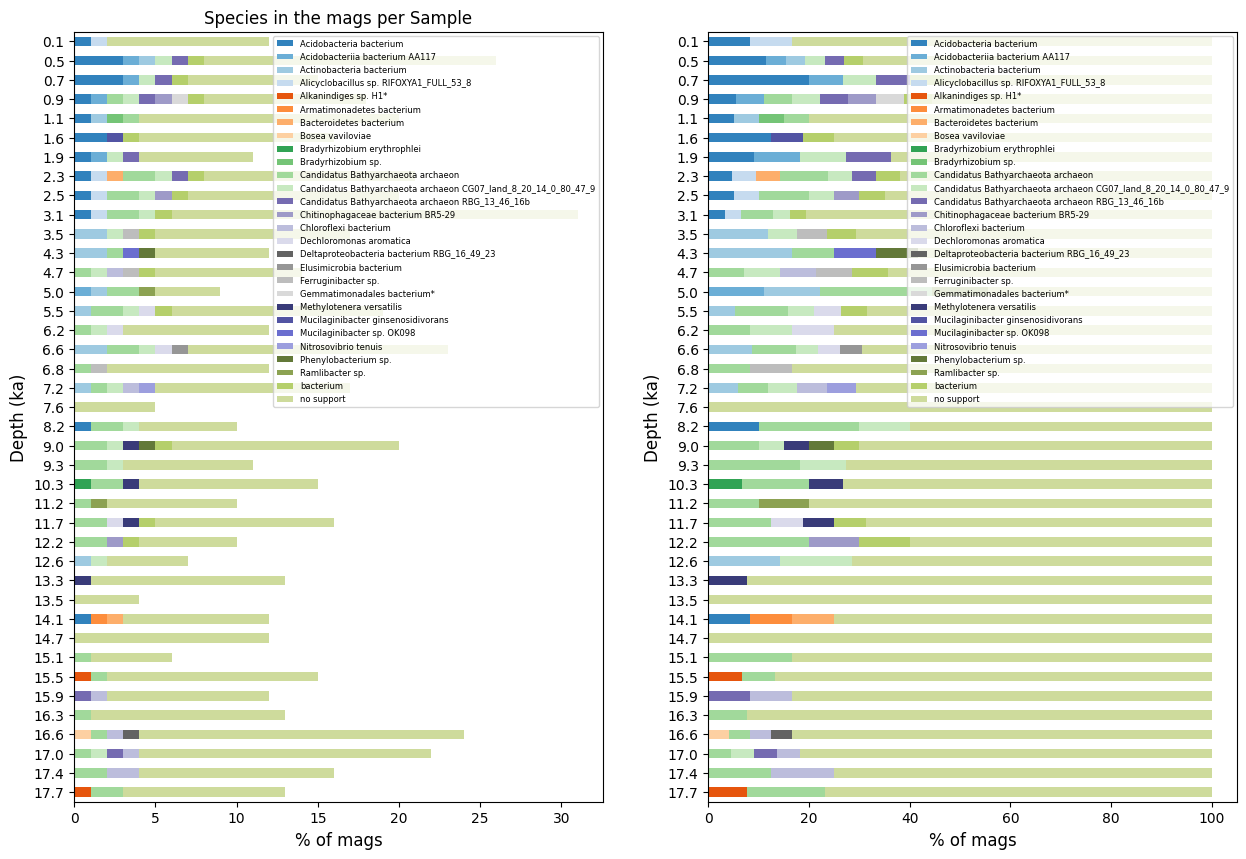

In [26]:
#SPECIES

fig, axes = plt.subplots(1,2,figsize=(15,10))

df_cat['Sample'] = (df_cat['# bin']).str.split('-').str[2]
df_cat['Sample'] = df_cat['Sample'].str[:11]
df_cat['species'] = (df_cat['species']).str.split(':').str[0]
df_cat['# bins'] = 1
df_cat.fillna('unknown', inplace=True)
df_cat.replace(name_age_dict, inplace=True)

df_cat_species=df_cat.drop(['classification', 'reason','lineage','lineage scores','superkingdom','phylum','class','order','family','genus','# bin'], axis=1)
pivot_df_cat_species = df_cat_species.pivot_table(index='Sample', columns='species',values='# bins', aggfunc='sum').fillna(0)

pivot_df_cat_species.sort_index(ascending=False, inplace=True)
pivot_df_cat_species.plot(kind='barh', stacked=True, ax=axes[0], color=custom_colours)
axes[0].set_ylabel('Depth (ka)', fontsize=12)
axes[0].set_title('Species in the mags per Sample')
axes[0].set_xlabel('% of mags', fontsize=12)
axes[0].legend(fontsize=6, loc='upper right')

total_bin_number=df_cat_species.groupby('Sample', as_index=False).agg({'# bins': 'sum'})


df_cat_species_grouped=df_cat_species.groupby(['Sample','species'], as_index=False).agg({'# bins': 'sum'})


df_cat_species_merged = df_cat_species_grouped.merge(total_bin_number, on='Sample', suffixes=('','_total'))


df_cat_species_merged['Prop'] = (df_cat_species_merged['# bins'] / df_cat_species_merged['# bins_total'])*100

pivot_df_cat_species_merged = df_cat_species_merged.pivot_table(index='Sample', columns='species',values='Prop', aggfunc='sum').fillna(0)

pivot_df_cat_species_merged.sort_index(ascending=False, inplace=True)
pivot_df_cat_species_merged.plot(kind='barh', stacked=True, ax=axes[1], color=custom_colours)
axes[1].set_ylabel('Depth (ka)', fontsize=12)
axes[1].set_xlabel('% of mags', fontsize=12)
axes[1].legend(fontsize=6, loc='upper right')

Quality of bins with damaged contigs

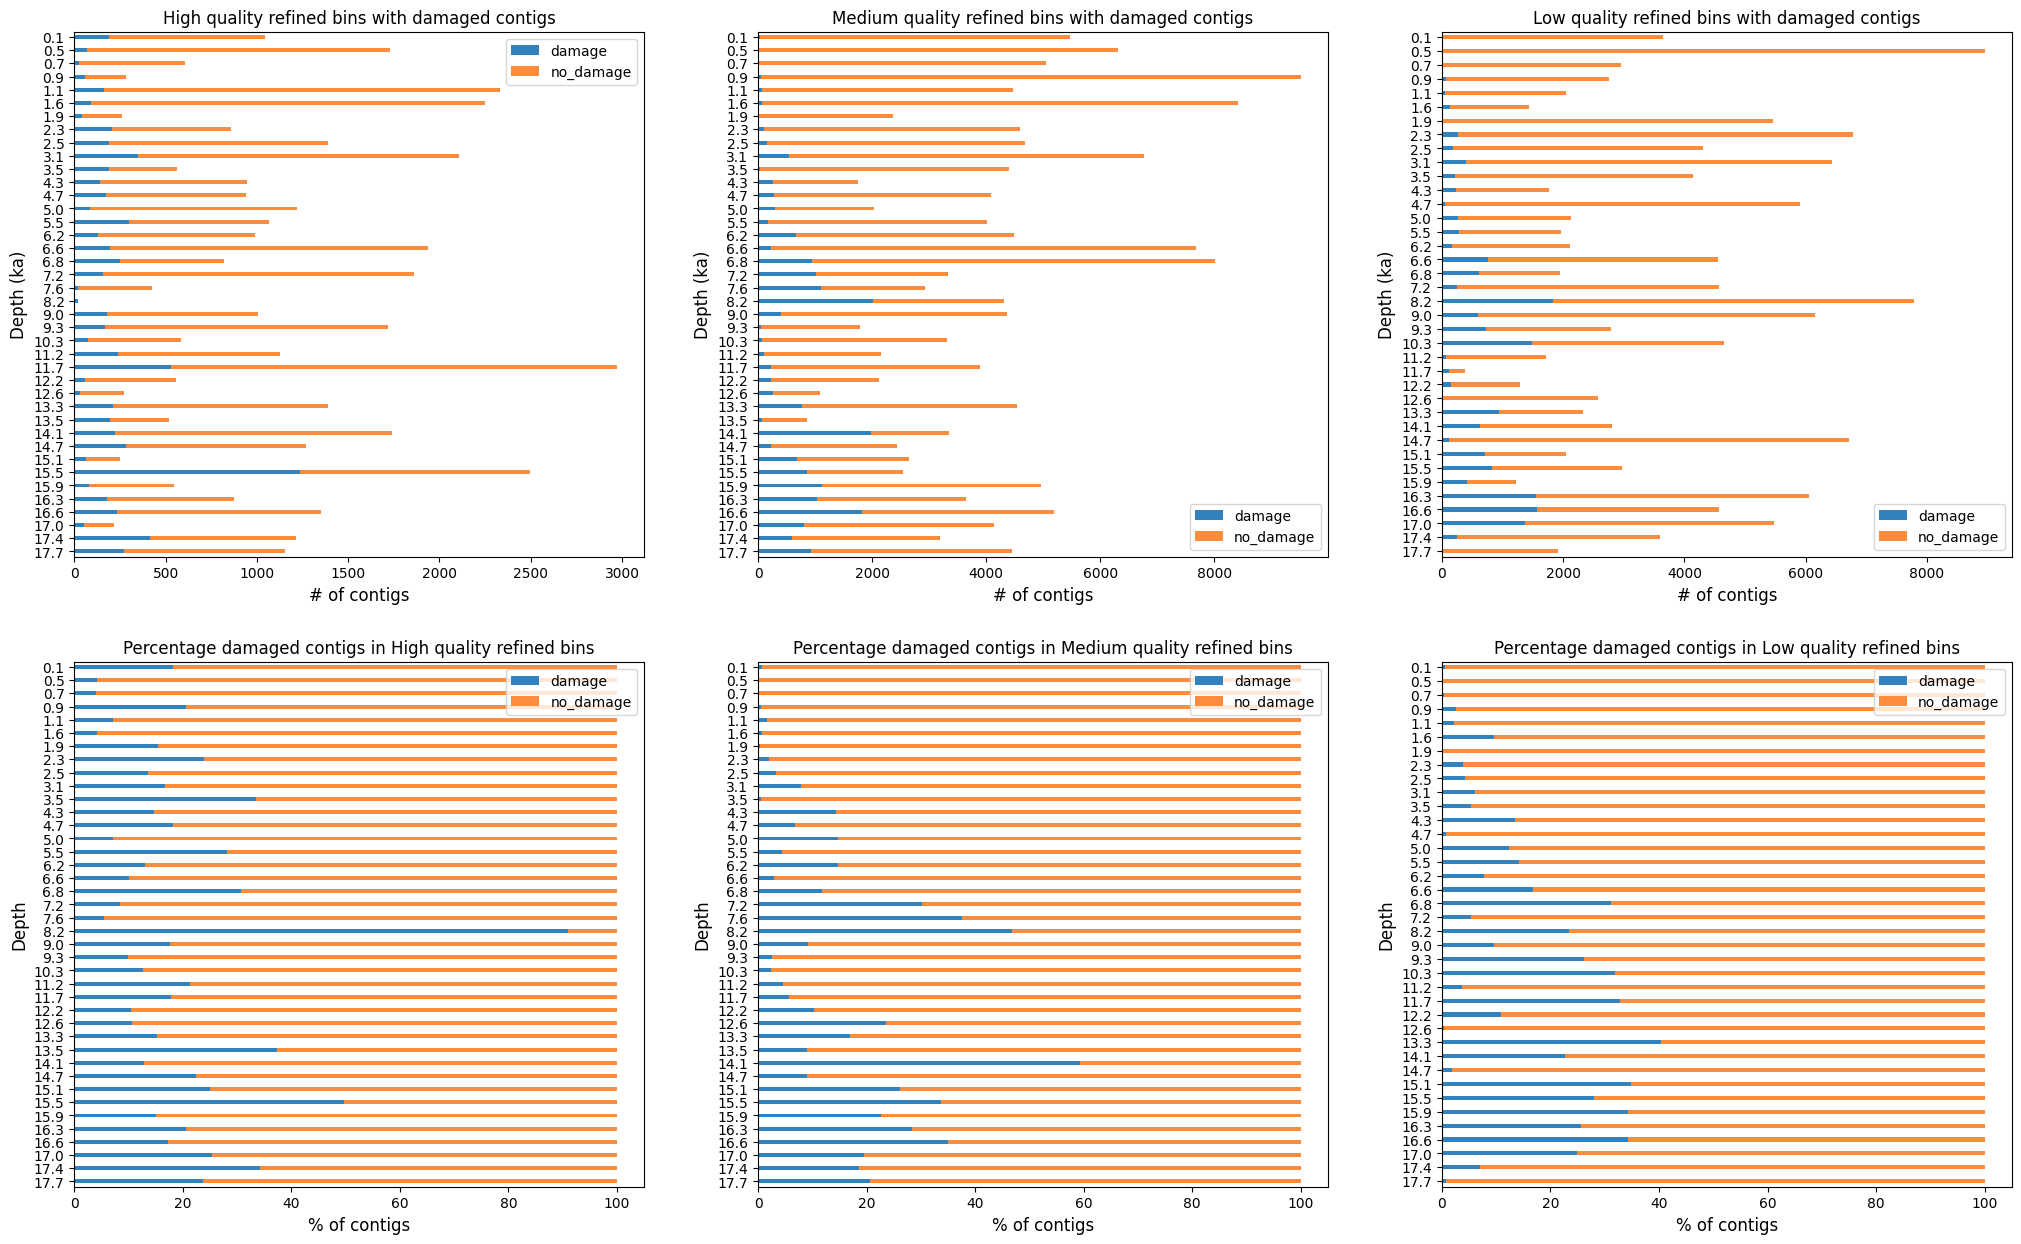

In [27]:
#Plot number of damaged contigs in hq mq and lq mags pers sample, seperatly
fig, axes = plt.subplots(2, 3, figsize=(25, 15))
#refined bin quality, pydamage
df_bins_damage = df_bins_contigs.merge(df_pydamage, on=['Sample','contig_id']).dropna()
df_ref_bin_qc['Sample'] = (df_ref_bin_qc['bin']).str.split('-').str[2]
df_ref_bin_qc['Sample'] = df_ref_bin_qc['Sample'].str[:11]

df_ref_bin_qc['Sample'] = df_ref_bin_qc['Sample'].replace(name_age_dict)

df_bins_damage['bin'] = df_bins_damage['bin'].str[:-3]

df_hq = df_ref_bin_qc.where(df_ref_bin_qc['checkm2_quality'] == 'High').dropna()
df_mq = df_ref_bin_qc.where(df_ref_bin_qc['checkm2_quality'] == 'Medium').dropna()
df_lq = df_ref_bin_qc.where(df_ref_bin_qc['checkm2_quality'] == 'Low').dropna()

def plot(df,i,quality):
    df_merged = df.merge(df_bins_damage, on=['Sample','bin']).dropna()
    unique_samples = df_merged['Sample'].unique()

    data={
        'Sample': [],
        'Damaged': [],
        '#contigs': []
    }

    for item in unique_samples:
        count_damaged = ((df_merged['Sample'] == item) & (df_merged['Damaged'] == 'damage')).sum() 
        count_nodamage = ((df_merged['Sample'] == item) & (df_merged['Damaged'] == 'no_damage')).sum() 
        
        data['Sample'].append(item)
        data['Damaged'].append('damage')
        data['#contigs'].append(count_damaged)

        data['Sample'].append(item)
        data['Damaged'].append('no_damage')
        data['#contigs'].append(count_nodamage)

    df_bins_contig_damage_counts = pd.DataFrame(data)

    pivot_df_bins_damage = df_bins_contig_damage_counts.pivot(index='Sample', columns='Damaged', values='#contigs')
    pivot_df_bins_damage.sort_index(ascending=False, inplace=True)
    pivot_df_bins_damage.plot(kind='barh',  stacked=True, ax=axes[0][i],width=0.3, color=[damage_colour_dict[col] for col in pivot_df_pydamage_counts.columns])
    axes[0][i].set_ylabel('Depth (ka)', fontsize=12)
    axes[0][i].set_xlabel('# of contigs', fontsize=12)
    axes[0][i].set_title(f'{quality} quality refined bins with damaged contigs')
    axes[0][i].legend()

    total_contig_number=df_bins_contig_damage_counts.groupby('Sample')['#contigs'].sum().reset_index()

    df_bins_damage_counts_merged = df_bins_contig_damage_counts.merge(total_contig_number, on='Sample', suffixes=('','_total'))

    df_bins_damage_counts_merged['Prop'] = (df_bins_damage_counts_merged['#contigs'] / df_bins_damage_counts_merged['#contigs_total'])*100
    pivot_df_bins_damage_counts_merged = df_bins_damage_counts_merged.pivot(index='Sample', columns='Damaged', values='Prop').fillna(0)

    # Create a stacked bar plot
    pivot_df_bins_damage_counts_merged.sort_index(ascending=False, inplace=True)
    pivot_df_bins_damage_counts_merged.plot(kind='barh', stacked=True, ax=axes[1][i],width=0.3, color=[damage_colour_dict[col] for col in pivot_df_pydamage_counts_merged.columns])

    axes[1][i].set_xlabel("% of contigs", fontsize=12)
    axes[1][i].set_ylabel('Depth', fontsize=12)
    axes[1][i].set_title(f'Percentage damaged contigs in {quality} quality refined bins')
    axes[1][i].legend(fontsize=10, loc='upper right')


plot(df_hq,0,'High')
plot(df_mq,1,'Medium')
plot(df_lq,2,'Low')


plot with taxonomy for all hq mq and lq mags seperatly

/scratch/tmp/ipykernel_7986/2267709971.py:37: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df_level = df.pivot_table(index='quality', columns=level,values='# bins', aggfunc='sum').fillna(0)
/scratch/tmp/ipykernel_7986/2267709971.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bin_number=df.groupby('quality', as_index=False).agg({'# bins': 'sum'})
/scratch/tmp/ipykernel_7986/2267709971.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

Text(0.5, 1.0, 'Species in different quality bins')

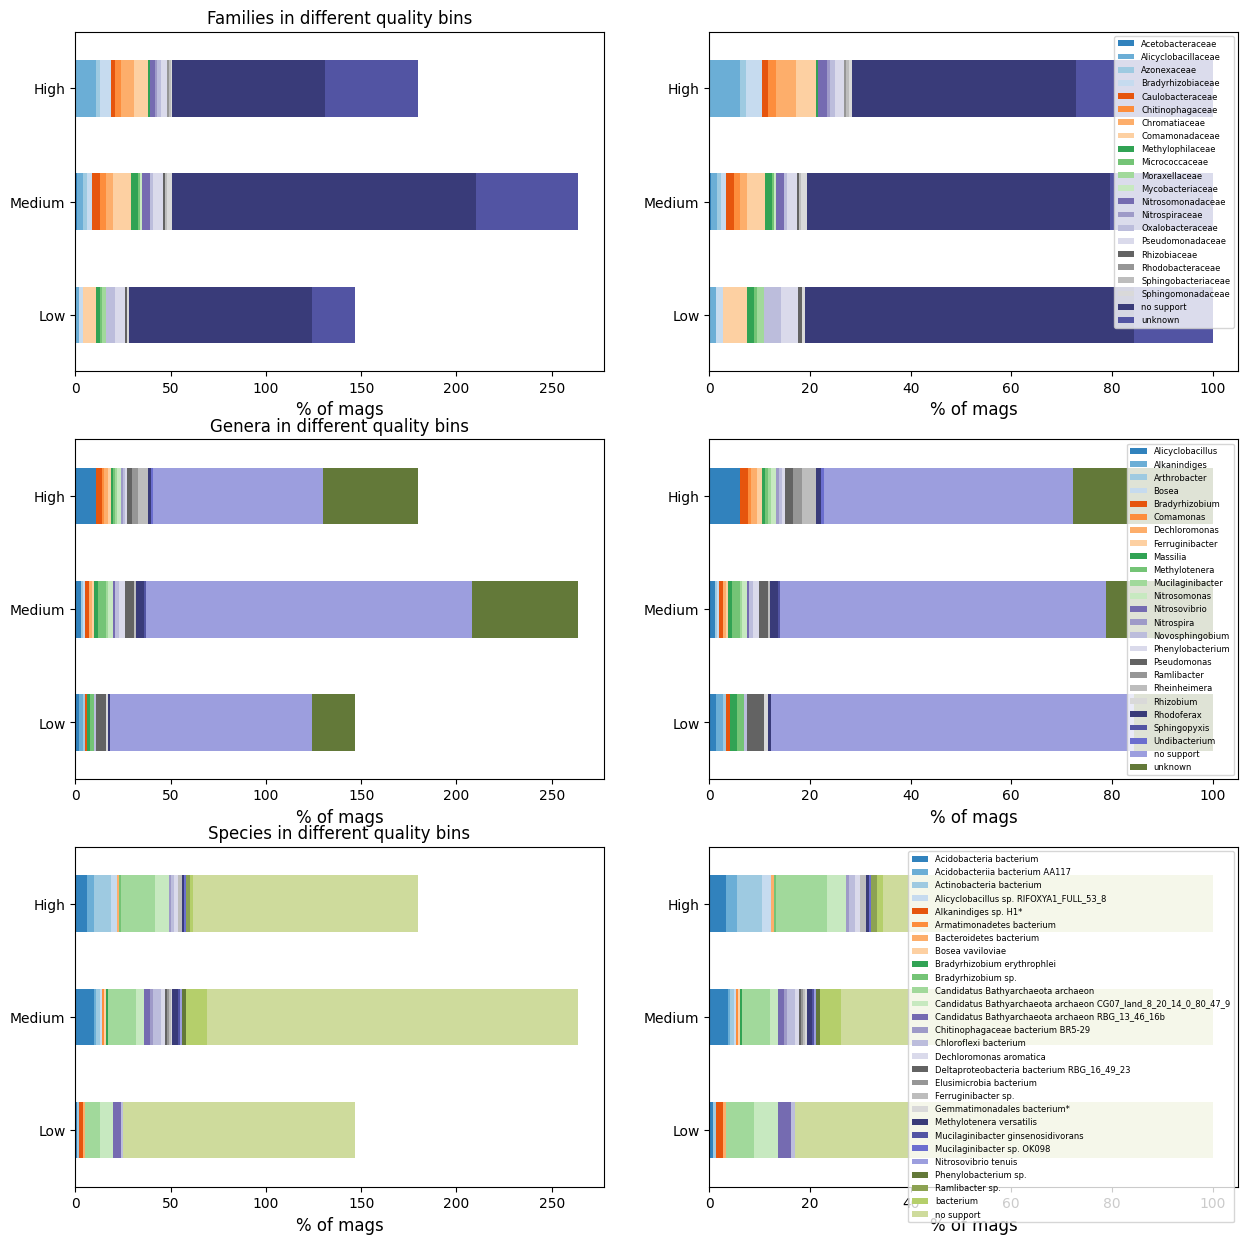

In [28]:
fig, axes = plt.subplots(3,2,figsize=(15,15))

df_cat['Sample'] = (df_cat['# bin']).str.split('-').str[2]
df_cat['Sample'] = df_cat['Sample'].str[:11]
df_cat['bin'] = df_cat['# bin']
df_cat['bin'] = (df_cat['bin']).str.split('.fa').str[0]

df_cat['family'] = (df_cat['family']).str.split(':').str[0]
df_cat['genus'] = (df_cat['genus']).str.split(':').str[0]
df_cat['species'] = (df_cat['species']).str.split(':').str[0]
df_cat.fillna('unknown', inplace=True)


df_ref_bin_qc['Sample'] = (df_ref_bin_qc['bin']).str.split('-').str[2]
df_ref_bin_qc['Sample'] = df_ref_bin_qc['Sample'].str[:11]
df_ref_bin_qc.drop(['busco_quality','gunc_quality'], axis=1, inplace=True)
df_ref_bin_qc['Sample'] = df_ref_bin_qc['Sample'].replace(name_age_dict)
df_ref_bin_qc['quality'] = df_ref_bin_qc['checkm2_quality']


df_tax = df_ref_bin_qc.merge(df_cat, on = ['bin']).dropna()

df_tax.drop(df[df['Sample'].isin(duplicate_samples)].index, inplace=True)

df_tax['# bins'] = 1

df_tax.drop(['classification', 'reason','lineage','lineage scores','superkingdom','phylum','class','order','# bin'], axis=1, inplace=True)
custom_order = [ "Low", "Medium","High"]
df_tax["quality"] = pd.Categorical(df_tax["quality"], categories=custom_order, ordered=True)

# # Sort by the custom order
df_tax.sort_values("quality", inplace=True)

#FAMILY
def func(df,level,i): #level either genus, family, species  
    
    pivot_df_level = df.pivot_table(index='quality', columns=level,values='# bins', aggfunc='sum').fillna(0)

    pivot_df_level.plot(kind='barh', stacked=True, ax=axes[i][0], color=custom_colours, legend=False)
    axes[i][0].set_ylabel('')
    axes[i][0].set_title(f'{level} in different quality bins')
    axes[i][0].set_xlabel('% of mags', fontsize=12)

    total_bin_number=df.groupby('quality', as_index=False).agg({'# bins': 'sum'})

    df_level_grouped=df.groupby(['quality',level]).agg({'# bins': 'sum'}).reset_index()

    df_level_merged = df_level_grouped.merge(total_bin_number, on='quality', suffixes=('','_total'))
    df_level_merged.sort_values(by='# bins', inplace=True, ascending=False)

    df_level_merged['Prop'] = (df_level_merged['# bins'] / df_level_merged['# bins_total'])*100

    pivot_df_level_merged = df_level_merged.pivot_table(index='quality', columns=level,values='Prop', aggfunc='sum').fillna(0)

    pivot_df_level_merged.plot(kind='barh', stacked=True, ax=axes[i][1], color=custom_colours)
    axes[i][1].set_ylabel('')
    axes[i][1].set_xlabel('% of mags', fontsize=12)
    axes[i][1].legend(fontsize=6, loc='upper right')
    
func(df_tax,'family',0)
func(df_tax,'genus',1)
func(df_tax,'species',2)
axes[0][0].set_title('Families in different quality bins')
axes[1][0].set_title('Genera in different quality bins')
axes[2][0].set_title('Species in different quality bins')


number of high, medium and low quality bins

Text(0, 0.5, 'Number of bins')

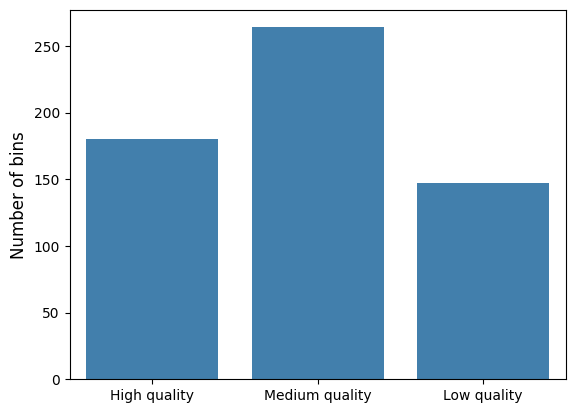

In [29]:

d['Sample'] = (d['bin']).str.split('-').str[2]
d['Sample'] = d['Sample'].str[:11]
d.drop(d[d['Sample'].isin(duplicate_samples)].index, inplace=True)
d_hq = d.where(d['checkm2_quality'] == 'High').dropna()
d_mq = d.where(d['checkm2_quality'] == 'Medium').dropna()
d_lq = d.where(d['checkm2_quality'] == 'Low').dropna()

data={
    'Quality':['High quality', 'Medium quality', 'Low quality'],
    '# Bins' :[len(d_hq),len(d_mq),len(d_lq)]
}
df_bin_numbers = pd.DataFrame(data)
sns.barplot(data=df_bin_numbers,x='Quality', y='# Bins', color = '#3182bd' )
plt.xlabel('')
plt.ylabel('Number of bins', fontsize=12)

GTDB-Tk Taxonomy

In [30]:
df_gtdbtk['Sample'] = (df_gtdbtk['user_genome']).str.split('-').str[2]
df_gtdbtk['Sample'] = df_gtdbtk['Sample'].str[:11]

df_gtdbtk['species'] = (df_gtdbtk['classification']).str.split(';').str[6]
df_gtdbtk['species'] = df_gtdbtk['species'].str[3:]
df_gtdbtk['species'] = df_gtdbtk['species'].str.replace(r'_[A-Za-z] ', ' ', regex=True)
df_gtdbtk['species'] = df_gtdbtk['species'].str.replace(r'_[A-Za-z][A-Za-z]', '', regex=True)
df_gtdbtk['species'] = df_gtdbtk['species'].str.replace(r'_[A-Za-z]', '', regex=True)

df_gtdbtk['genus'] = (df_gtdbtk['classification']).str.split(';').str[5]
df_gtdbtk['genus'] = df_gtdbtk['genus'].str[3:]
df_gtdbtk['genus'] = df_gtdbtk['genus'].str.replace(r'_[A-Za-z]', '', regex=True)

df_gtdbtk['family'] = (df_gtdbtk['classification']).str.split(';').str[4]
df_gtdbtk['family'] = df_gtdbtk['family'].str[3:]

df_gtdbtk['order'] = (df_gtdbtk['classification']).str.split(';').str[3]
df_gtdbtk['order'] = df_gtdbtk['order'].str[3:]

df_gtdbtk['class'] = (df_gtdbtk['classification']).str.split(';').str[2]
df_gtdbtk['class'] = df_gtdbtk['class'].str[3:]

df_gtdbtk['phylum'] = (df_gtdbtk['classification']).str.split(';').str[1]
df_gtdbtk['phylum'] = df_gtdbtk['phylum'].str[3:]
df_gtdbtk['phylum'] = df_gtdbtk['phylum'].str.replace(r'_[A-Za-z]', '', regex=True)

df_gtdbtk['bin'] = df_gtdbtk['user_genome']
df_gtdbtk.fillna('unknown', inplace=True)
df_gtdbtk['# bins'] = 1
df_gtdbtk.replace({'':'unknown'}, inplace=True)

df_gtdbtk_merge = df_ref_bin_qc.merge(df_gtdbtk, on = ['bin']).dropna()

df_gtdbtk_merge.drop(df_gtdbtk_merge[df_gtdbtk_merge['Sample_x'].isin(duplicate_samples)].index, inplace=True)

df_gtdbtk_merge.drop(df_gtdbtk_merge[df_gtdbtk_merge['checkm2_quality'].isin(['Low'])].index, inplace=True)

df_gtdbtk_merge_hq = df_gtdbtk_merge.where(df_gtdbtk_merge['checkm2_quality'] == 'High').dropna()
df_gtdbtk_merge_mq = df_gtdbtk_merge.where(df_gtdbtk_merge['checkm2_quality'] == 'Medium').dropna()

df_gtdbtk_merge_hq.to_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/gtdbtk_hq.csv",columns=["bin", "class", "species", "genus", "family", "checkm2_quality"])
df_gtdbtk_merge_mq.to_csv("/Net/Groups/pbtdata/01_RAG/09_sediments/tibetan_sediments/04-analysis/gtdbtk_mq.csv",columns=["bin", "class", "species", "genus", "family", "checkm2_quality"])


/scratch/tmp/ipykernel_7986/2479777186.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_gtdbtk.fillna('unknown', inplace=True)


In [31]:
def tax_quality_plot(df,i,level,legend_dict):

    total_bin_number=df.groupby('Sample_x', as_index=False).agg({'# bins': 'sum'})
    df_grouped=df.groupby(['Sample_x',level]).agg({'# bins': 'sum'}).reset_index()
    
    df_merged = df_grouped.merge(total_bin_number, on='Sample_x', suffixes=('','_total'))
    df_merged.sort_values(by='# bins', inplace=True, ascending=False)

    df_merged['Prop'] = (df_merged['# bins'] / df_merged['# bins_total'])*100

    pivot_df_merged = df_merged.pivot_table(index='Sample_x', columns=level,values='Prop', aggfunc='sum').fillna(0)

    for colum in colums_to_plot:
        if colum not in pivot_df_merged.columns:
            pivot_df_merged[colum]=0
    pivot_df_merged_selected = pivot_df_merged[colums_to_plot]

    pivot_df_merged_selected.sort_index(ascending=False, inplace=True)
    pivot_df_merged_selected.plot(kind='barh', stacked=True, ax=axes[i], color=[legend_dict[col] for col in pivot_df_merged_selected], legend=False)
    axes[i].set_ylabel('')


/scratch/tmp/ipykernel_7986/695559056.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df_merged_selected.sort_index(ascending=False, inplace=True)
/scratch/tmp/ipykernel_7986/695559056.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df_merged_selected.sort_index(ascending=False, inplace=True)


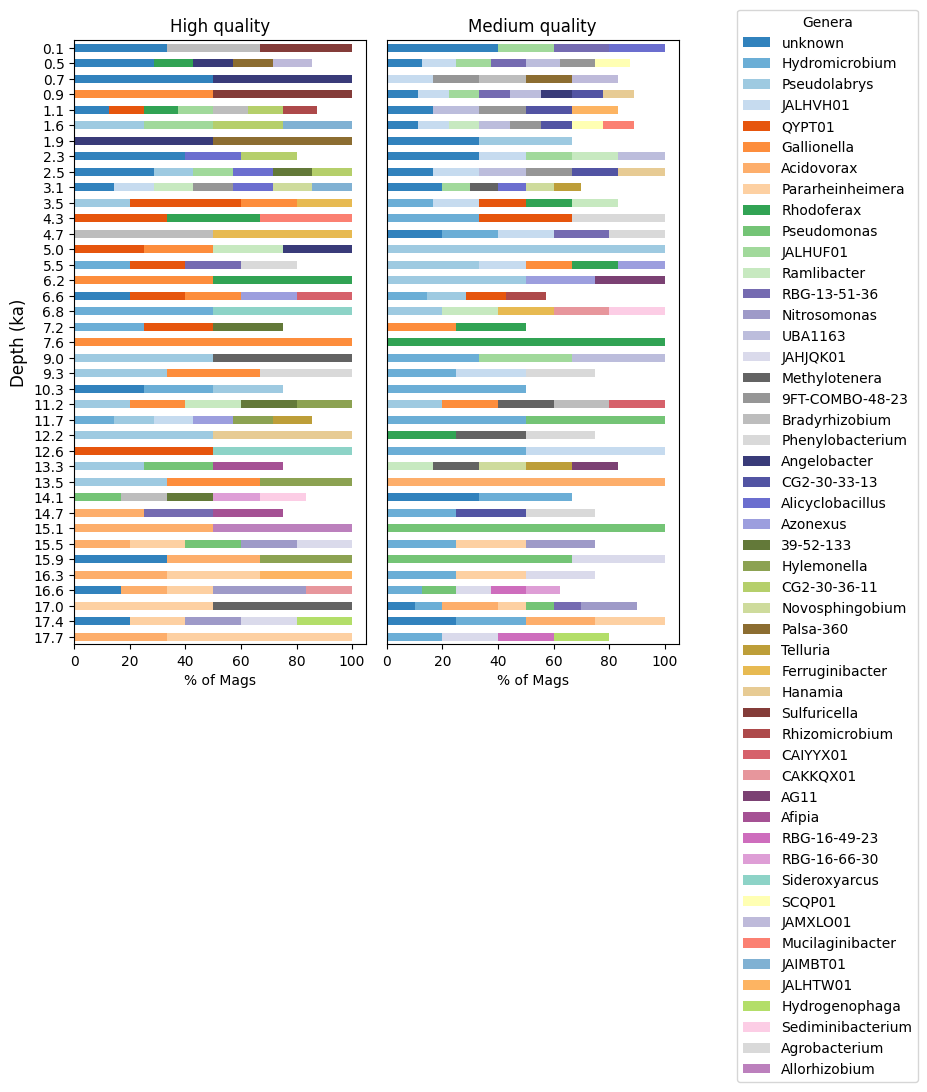

In [32]:
fig, axes = plt.subplots(1,2,figsize=(7,7))
taxa = list(df_gtdbtk_merge['genus'].unique())

colums_to_plot = []
df_tmp = df_gtdbtk_merge[['genus','# bins']]
df_fam_name_abundance = df_tmp.groupby('genus').sum()

df_fam_name_abundance.reset_index(inplace=True)
df_fam_name_abundance.sort_values(by='# bins', inplace=True, ascending=False)

for j in range(len(df_fam_name_abundance)):
    if j >= 50 :#100:
        break
    colums_to_plot.append(df_fam_name_abundance.iloc[j,0])
legend_dict = {}
for i in range(0,len(colums_to_plot)):
    legend_dict[colums_to_plot[i]] = custom_colours[i] 
legend_dict['nothing'] = 'white'


tax_quality_plot(df_gtdbtk_merge_hq,0,'genus',legend_dict)
tax_quality_plot(df_gtdbtk_merge_mq,1,'genus',legend_dict)
axes[0].set_title('High quality')
axes[0].set_ylabel('Depth (ka)', fontsize=12)
axes[0].set_xlabel('% of Mags')
axes[1].set_title('Medium quality')
axes[1].set_yticks([])
axes[1].set_xlabel('% of Mags')

legend_elemets =[]
for i in range(0, len(colums_to_plot)):
    legend_elemets.append(Patch(facecolor=custom_colours[i], label=colums_to_plot[i]))

fig.legend(handles=legend_elemets, title='Genera', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=10)
fig.tight_layout()

/scratch/tmp/ipykernel_7986/695559056.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df_merged_selected.sort_index(ascending=False, inplace=True)
/scratch/tmp/ipykernel_7986/695559056.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df_merged_selected.sort_index(ascending=False, inplace=True)


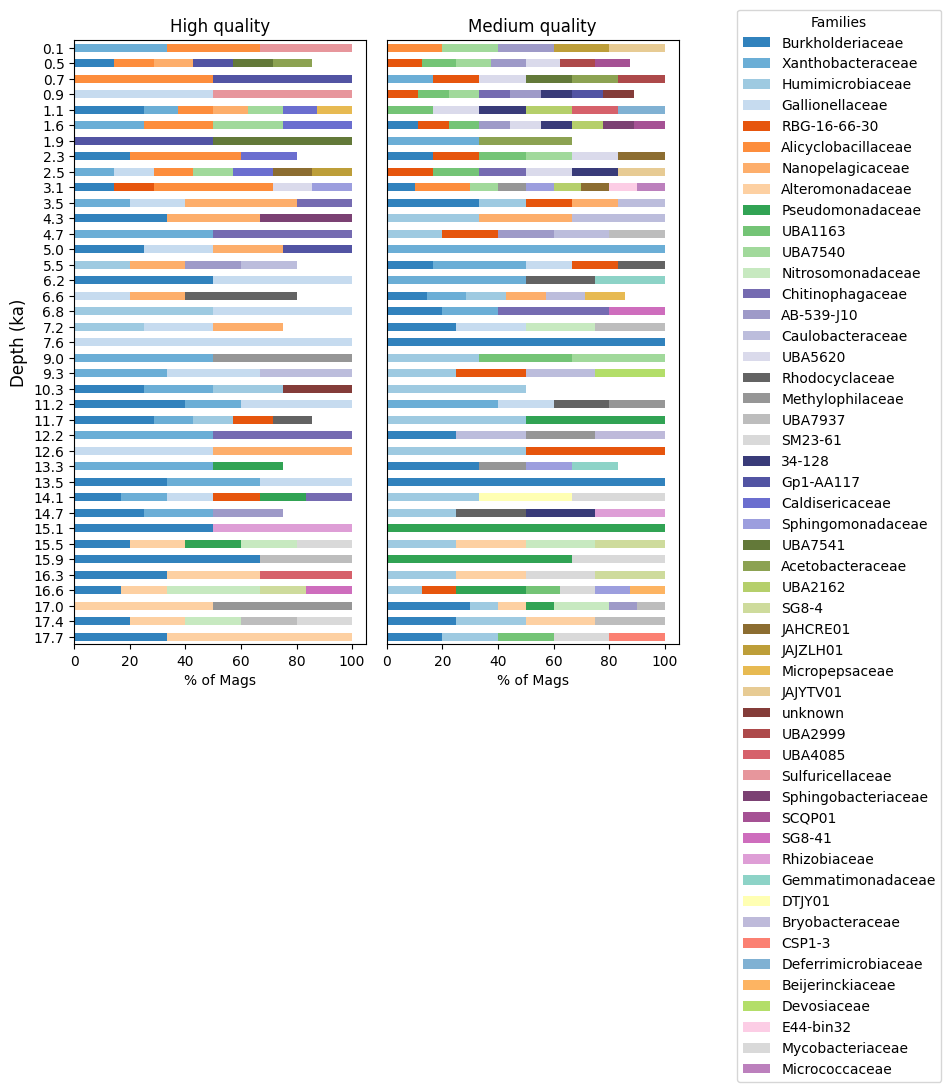

In [33]:
fig, axes = plt.subplots(1,2,figsize=(7,7))
taxa = list(df_gtdbtk_merge['family'].unique())

colums_to_plot = []
df_tmp = df_gtdbtk_merge[['family','# bins']]
df_fam_name_abundance = df_tmp.groupby('family').sum()

df_fam_name_abundance.reset_index(inplace=True)
df_fam_name_abundance.sort_values(by='# bins', inplace=True, ascending=False)

for j in range(len(df_fam_name_abundance)):
    if j >= 50:
        break
    colums_to_plot.append(df_fam_name_abundance.iloc[j,0])

legend_dict = {}
for i in range(0,len(colums_to_plot)):
    legend_dict[colums_to_plot[i]] = custom_colours[i] 
legend_dict['nothing'] = 'white'

tax_quality_plot(df_gtdbtk_merge_hq,0,'family',legend_dict)
tax_quality_plot(df_gtdbtk_merge_mq,1,'family',legend_dict)
axes[0].set_title('High quality')
axes[0].set_ylabel('Depth (ka)', fontsize=12)
axes[0].set_xlabel('% of Mags')
axes[1].set_title('Medium quality')
axes[1].set_yticks([])
axes[1].set_xlabel('% of Mags')

legend_elemets =[]
for i in range(0, len(colums_to_plot)):
    legend_elemets.append(Patch(facecolor=custom_colours[i], label=colums_to_plot[i]))

fig.legend(handles=legend_elemets, title='Families', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=10)
fig.tight_layout()

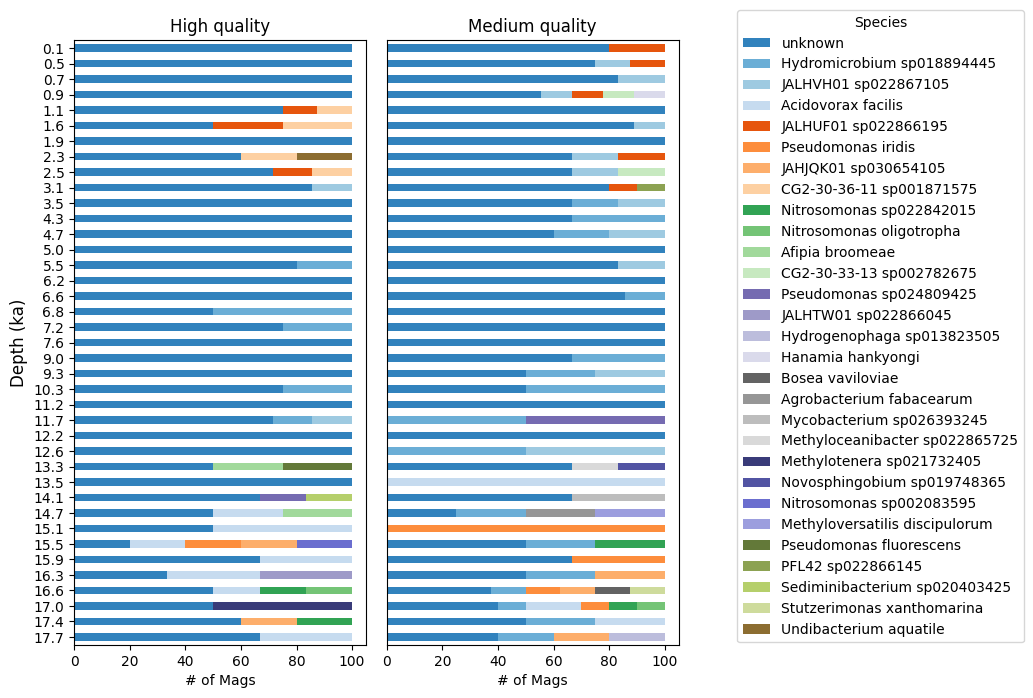

In [34]:
fig, axes = plt.subplots(1,2,figsize=(7,7))
taxa = list(df_gtdbtk_merge['species'].unique())

colums_to_plot = []
df_tmp = df_gtdbtk_merge[['species','# bins']]
df_fam_name_abundance = df_tmp.groupby('species').sum()
df_fam_name_abundance.reset_index(inplace=True)
df_fam_name_abundance.sort_values(by='# bins', inplace=True, ascending=False)

for j in range(len(df_fam_name_abundance)):
    if j >= 50:
        break
    colums_to_plot.append(df_fam_name_abundance.iloc[j,0])

legend_dict = {}
for i in range(0,len(colums_to_plot)):
    legend_dict[colums_to_plot[i]] = custom_colours[i] 
legend_dict['nothing'] = 'white'
    
tax_quality_plot(df_gtdbtk_merge_hq,0,'species',legend_dict)
tax_quality_plot(df_gtdbtk_merge_mq,1,'species',legend_dict)
axes[0].set_title('High quality')
axes[1].set_title('Medium quality')

axes[0].set_ylabel('Depth (ka)', fontsize=12)
axes[1].set_yticks([])

axes[0].set_ylabel('Depth (ka)', fontsize=12)
axes[1].set_yticks([])

axes[0].set_xlabel('% of Mags')
axes[1].set_xlabel('% of Mags')

axes[0].set_xlabel('# of Mags')
axes[1].set_xlabel('# of Mags')

legend_elemets =[]
for i in range(0, len(colums_to_plot)):
    legend_elemets.append(Patch(facecolor=custom_colours[i], label=colums_to_plot[i]))

fig.legend(handles=legend_elemets, title='Species', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=10)
fig.tight_layout()



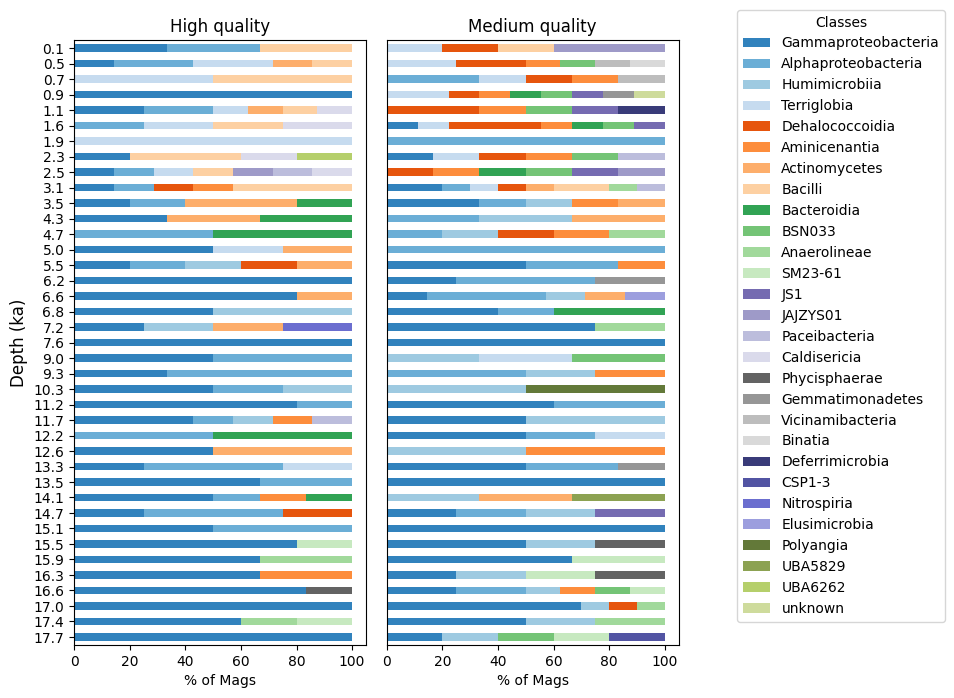

In [35]:
fig, axes = plt.subplots(1,2,figsize=(7,7))
taxa = list(df_gtdbtk_merge['class'].unique())

colums_to_plot = []
df_tmp = df_gtdbtk_merge[['class','# bins']]
df_fam_name_abundance = df_tmp.groupby('class').sum()

df_fam_name_abundance.reset_index(inplace=True)
df_fam_name_abundance.sort_values(by='# bins', inplace=True, ascending=False)

for j in range(len(df_fam_name_abundance)):
    if j >= 50:
        break
    colums_to_plot.append(df_fam_name_abundance.iloc[j,0])

legend_dict = {}
for i in range(0,len(colums_to_plot)):
    legend_dict[colums_to_plot[i]] = custom_colours[i] 
legend_dict['nothing'] = 'white'

tax_quality_plot(df_gtdbtk_merge_hq,0,'class',legend_dict)
tax_quality_plot(df_gtdbtk_merge_mq,1,'class',legend_dict)
axes[0].set_title('High quality')
axes[1].set_title('Medium quality')
axes[0].set_ylabel('Depth (ka)', fontsize=12)
axes[1].set_yticks([])
axes[0].set_xlabel('% of Mags')
axes[1].set_xlabel('% of Mags')

legend_elemets =[]
for i in range(0, len(colums_to_plot)):
    legend_elemets.append(Patch(facecolor=custom_colours[i], label=colums_to_plot[i]))

fig.legend(handles=legend_elemets, title='Classes', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=10)
fig.tight_layout()

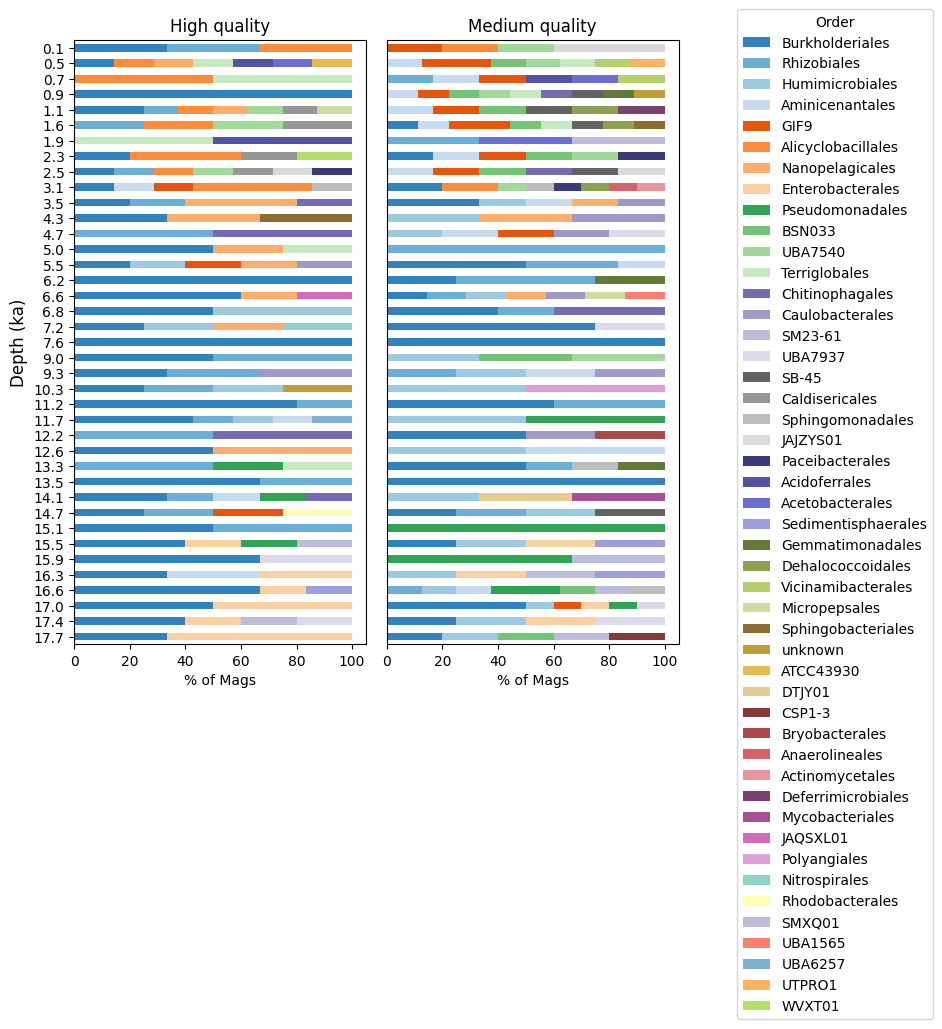

In [36]:
fig, axes = plt.subplots(1,2,figsize=(7,7))
taxa = list(df_gtdbtk_merge['order'].unique())

colums_to_plot = []
df_tmp = df_gtdbtk_merge[['order','# bins']]
df_fam_name_abundance = df_tmp.groupby('order').sum()

df_fam_name_abundance.reset_index(inplace=True)
df_fam_name_abundance.sort_values(by='# bins', inplace=True, ascending=False)

for j in range(len(df_fam_name_abundance)):
    if j >= 50:
        break
    colums_to_plot.append(df_fam_name_abundance.iloc[j,0])
    
legend_dict = {}
for i in range(0,len(colums_to_plot)):
    legend_dict[colums_to_plot[i]] = custom_colours[i] 
legend_dict['nothing'] = 'white'

tax_quality_plot(df_gtdbtk_merge_hq,0,'order',legend_dict)
tax_quality_plot(df_gtdbtk_merge_mq,1,'order',legend_dict)
axes[0].set_title('High quality')
axes[1].set_title('Medium quality')
axes[0].set_ylabel('Depth (ka)', fontsize=12)
axes[1].set_yticks([])
axes[0].set_xlabel('% of Mags')
axes[1].set_xlabel('% of Mags')

legend_elemets =[]
for i in range(0, len(colums_to_plot)):
    legend_elemets.append(Patch(facecolor=custom_colours[i], label=colums_to_plot[i]))

fig.legend(handles=legend_elemets, title='Order', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=10)
fig.tight_layout()

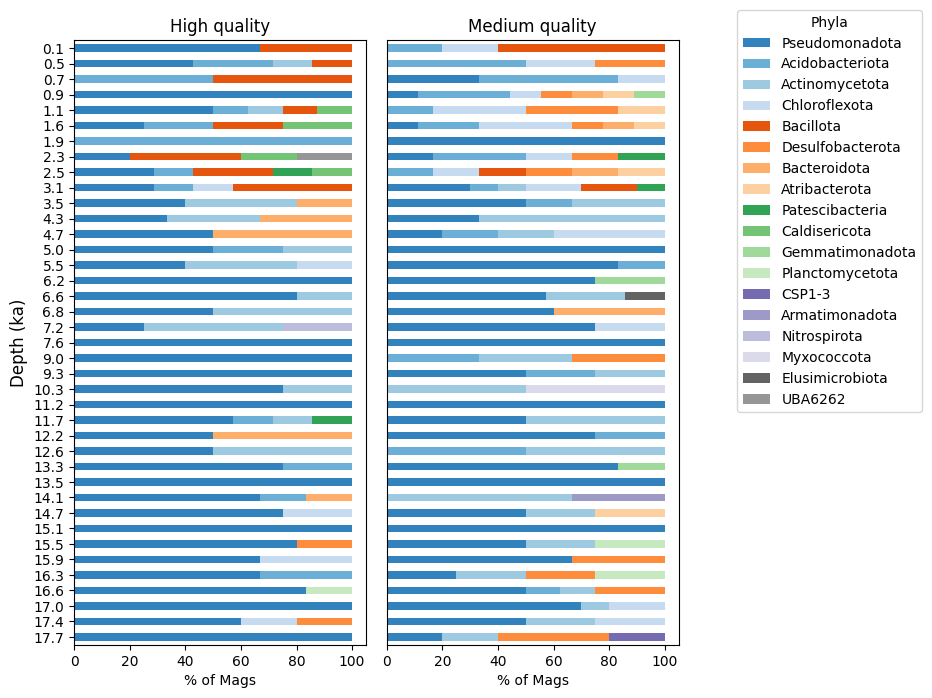

In [37]:
fig, axes = plt.subplots(1,2,figsize=(7,7))
taxa = list(df_gtdbtk_merge['phylum'].unique())

colums_to_plot = []
df_tmp = df_gtdbtk_merge[['phylum','# bins']]
df_fam_name_abundance = df_tmp.groupby('phylum').sum()

df_fam_name_abundance.reset_index(inplace=True)
df_fam_name_abundance.sort_values(by='# bins', inplace=True, ascending=False)

for j in range(len(df_fam_name_abundance)):
    if j >= 50:
        break
    colums_to_plot.append(df_fam_name_abundance.iloc[j,0])
    
legend_dict = {}
for i in range(0,len(colums_to_plot)):
    legend_dict[colums_to_plot[i]] = custom_colours[i] 
legend_dict['nothing'] = 'white'

tax_quality_plot(df_gtdbtk_merge_hq,0,'phylum',legend_dict)
tax_quality_plot(df_gtdbtk_merge_mq,1,'phylum',legend_dict)
axes[0].set_title('High quality')
axes[1].set_title('Medium quality')
axes[0].set_ylabel('Depth (ka)', fontsize=12)
axes[1].set_yticks([])
axes[0].set_xlabel('% of Mags')
axes[1].set_xlabel('% of Mags')

legend_elemets =[]
for i in range(0, len(colums_to_plot)):
    legend_elemets.append(Patch(facecolor=custom_colours[i], label=colums_to_plot[i]))

fig.legend(handles=legend_elemets, title='Phyla', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=10)
fig.tight_layout()